# 1. Model Architecture:
### Explain the transformer architecture in detail. How do self-attention mechanisms contribute to its success?


 ##### A High-Level over look of black box transformer lets deep drive into internal architecture futher.

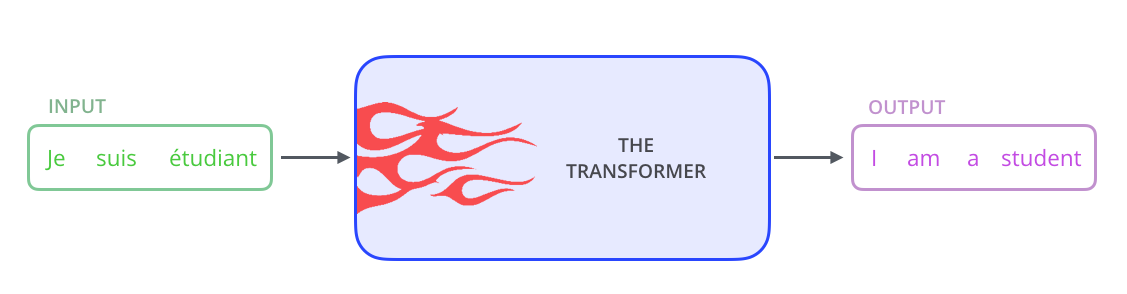

* In internal there are two blocks Encoder and Decoder

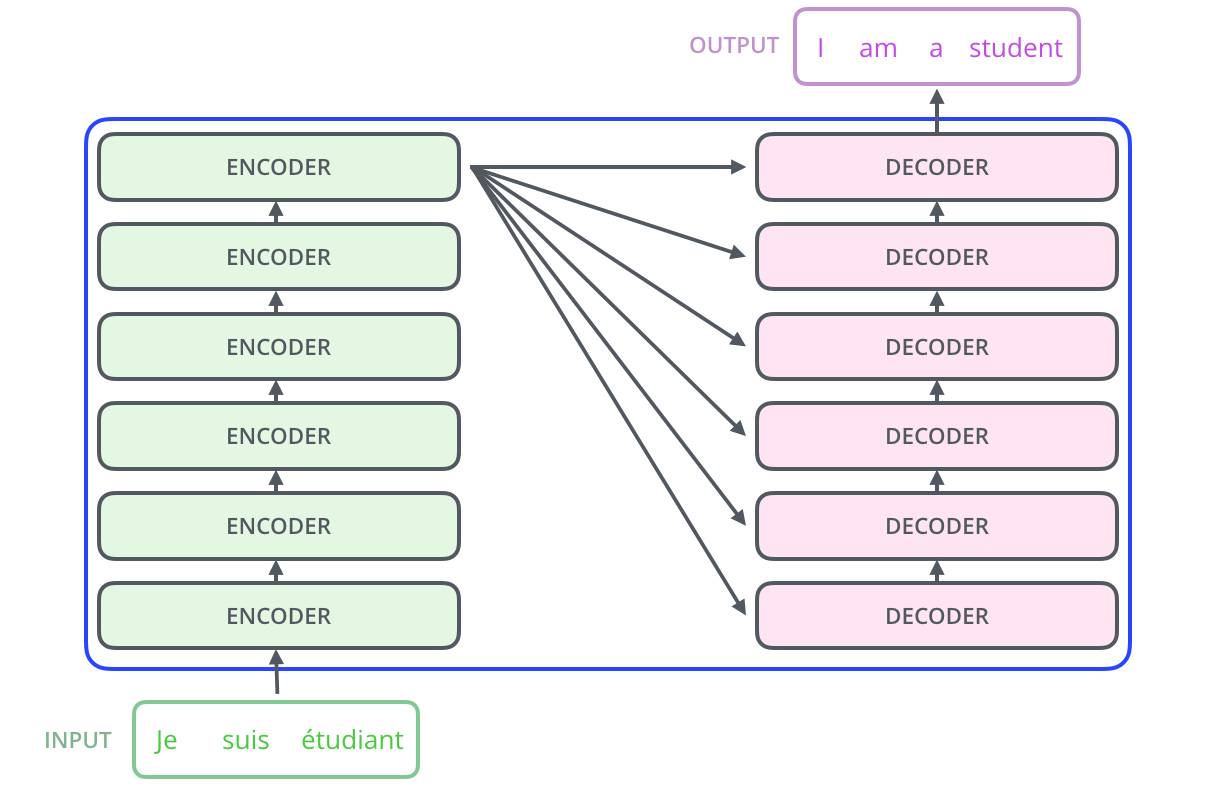

* As it has 6 Encoder Stack and 6 Decoder as shown in above figure. In research papper they have mention that as no. of encoder and decoder are hyperparameter by taking 6 it was giving good output so it has 6 Encoder and Decoder

* Now lets drive into internal architecture of Encoder and Decoder

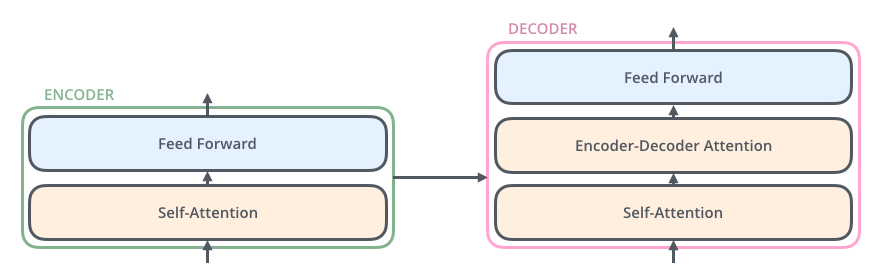

* Lets take single Encoder how its works

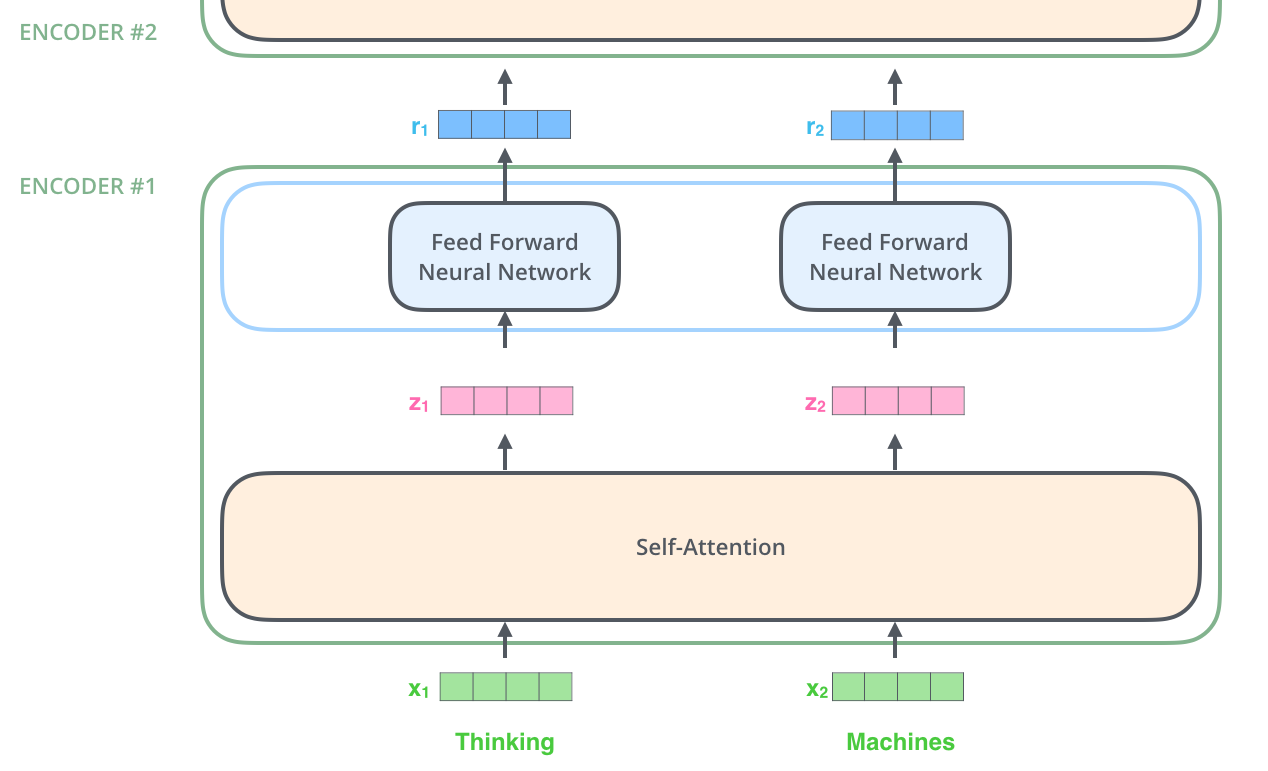

#### Self-Attention at a High Level 

”The animal didn't cross the street because it was too tired” 

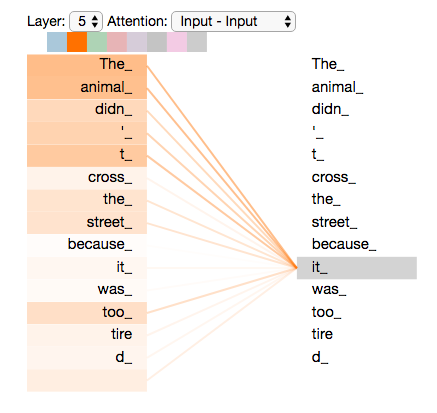

In the above sentences it is refering to animal this human can understand but machine cannot understand so this is where attention come into picture in which it is refering to which information is calculated mathematically. Input is converted into vectors using word Embedding technique specifically word2vec technique is used according to research papper.Each vector has size of 512 dimension.Now lets understand how it recognize the word which is important.


#### Self-Attention in Detail

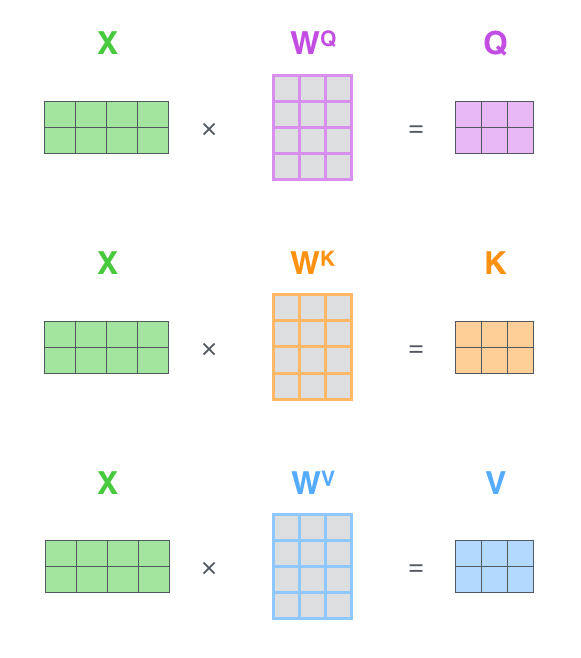

The first step in calculating self-attention is to create three vectors from each of the encoder’s input vectors (in this case, the embedding of each word). So for each word, we create a Query vector, a Key vector, and a Value vector. These vectors are created by multiplying the embedding by three matrices that we trained during the training process.
Notice that these new vectors are smaller in dimension than the embedding vector. Their dimensionality is 64, while the embedding and encoder input/output vectors have dimensionality of 512.

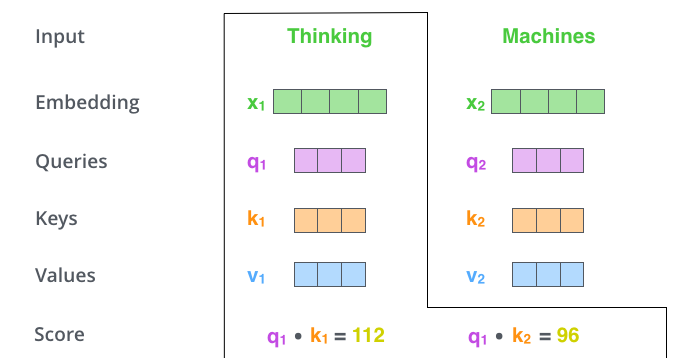

The second step in calculating self-attention is to calculate a score. Say we’re calculating the self-attention for the first word in this example, “Thinking”. We need to score each word of the input sentence against this word. The score determines how much focus to place on other parts of the input sentence as we encode a word at a certain position.

The score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.

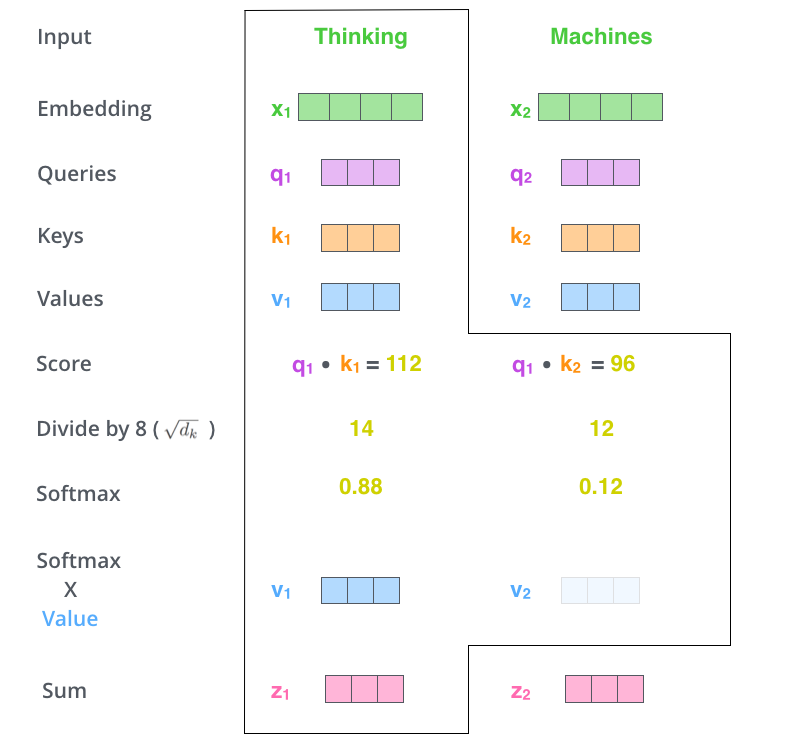

* The third and fourth steps are to divide the scores by 8 (the square root of the dimension of the key vectors used in the paper – 64. This leads to having more stable gradients. There could be other possible values here, but this is the default), then pass the result through a softmax operation. Softmax normalizes the scores so they’re all positive and add up to 1.
* This softmax score determines how much each word will be expressed at this position. Clearly the word at this position will have the highest softmax score, but sometimes it’s useful to attend to another word that is relevant to the current word.
* The fifth step is to multiply each value vector by the softmax score (in preparation to sum them up). The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example).
* The sixth step is to sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word).

It expands the model’s ability to focus on different positions. Yes, in the example above, z1 contains a little bit of every other encoding, but it could be dominated by the actual word itself. If we’re translating a sentence like “The animal didn’t cross the street because it was too tired”, it would be useful to know which word “it” refers to.

It gives the attention layer multiple “representation subspaces”. As we’ll see next, with multi-headed attention we have not only one, but multiple sets of Query/Key/Value weight matrices (the Transformer uses eight attention heads, so we end up with eight sets for each encoder/decoder). Each of these sets is randomly initialized. Then, after training, each set is used to project the input embeddings (or vectors from lower encoders/decoders) into a different representation subspace.

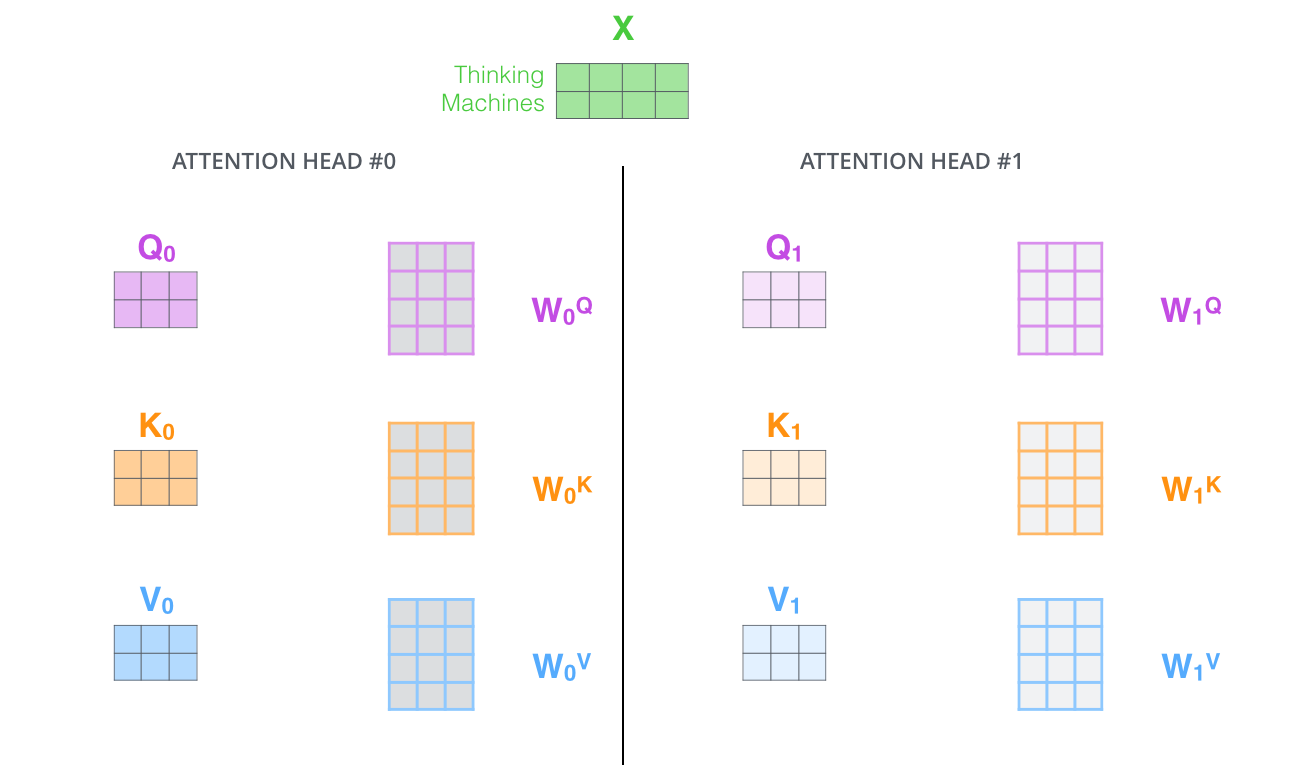

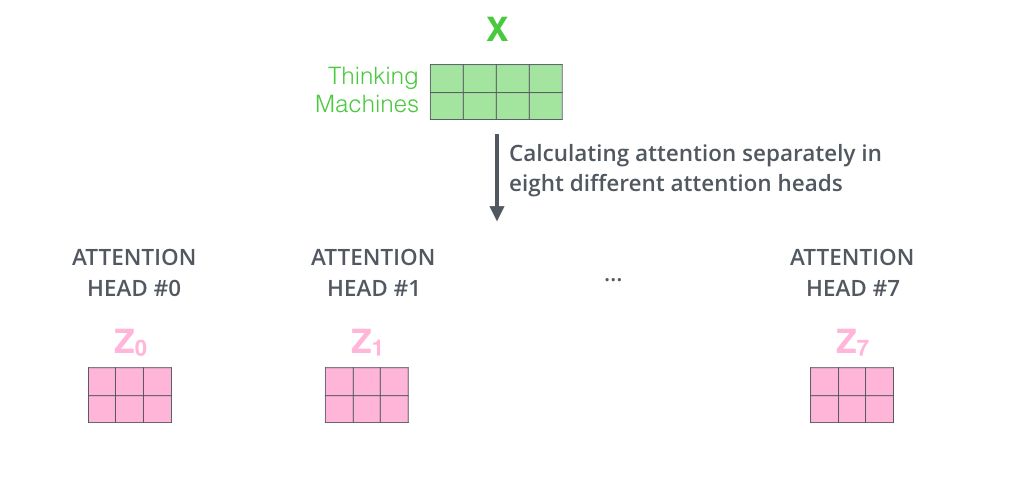

Finally we are concatenating all 8 output and multiplying with weight matrix and given to Feed Forward Neural Network which is shown below:

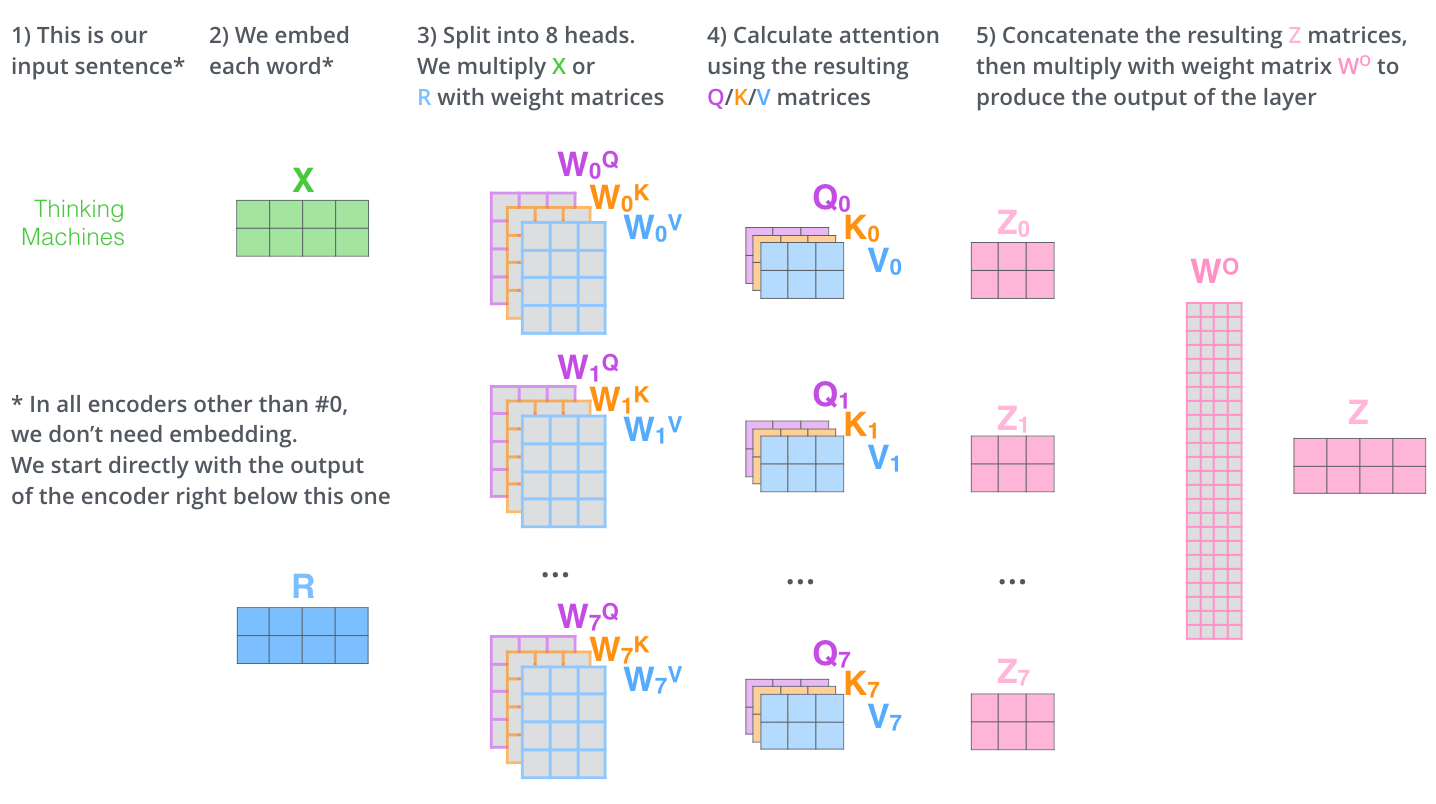

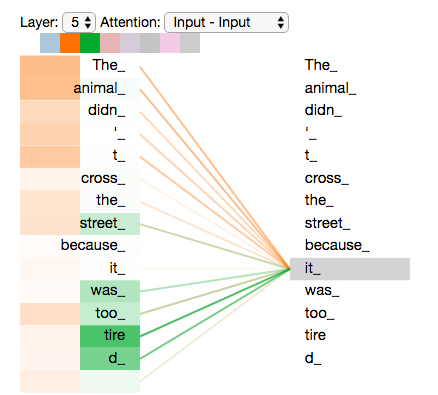

As we encode the word "it", one attention head is focusing most on "the animal", while another is focusing on "tired" -- in a sense, the model's representation of the word "it" bakes in some of the representation of both "animal" and "tired".


### Positional Encoding

One thing that’s missing from the model as we have described it so far is a way to account for the order of the words in the input sequence.

To address this, the transformer adds a vector to each input embedding. These vectors follow a specific pattern that the model learns, which helps it determine the position of each word, or the distance between different words in the sequence. The intuition here is that adding these values to the embeddings provides meaningful distances between the embedding vectors once they’re projected into Q/K/V vectors and during dot-product attention.

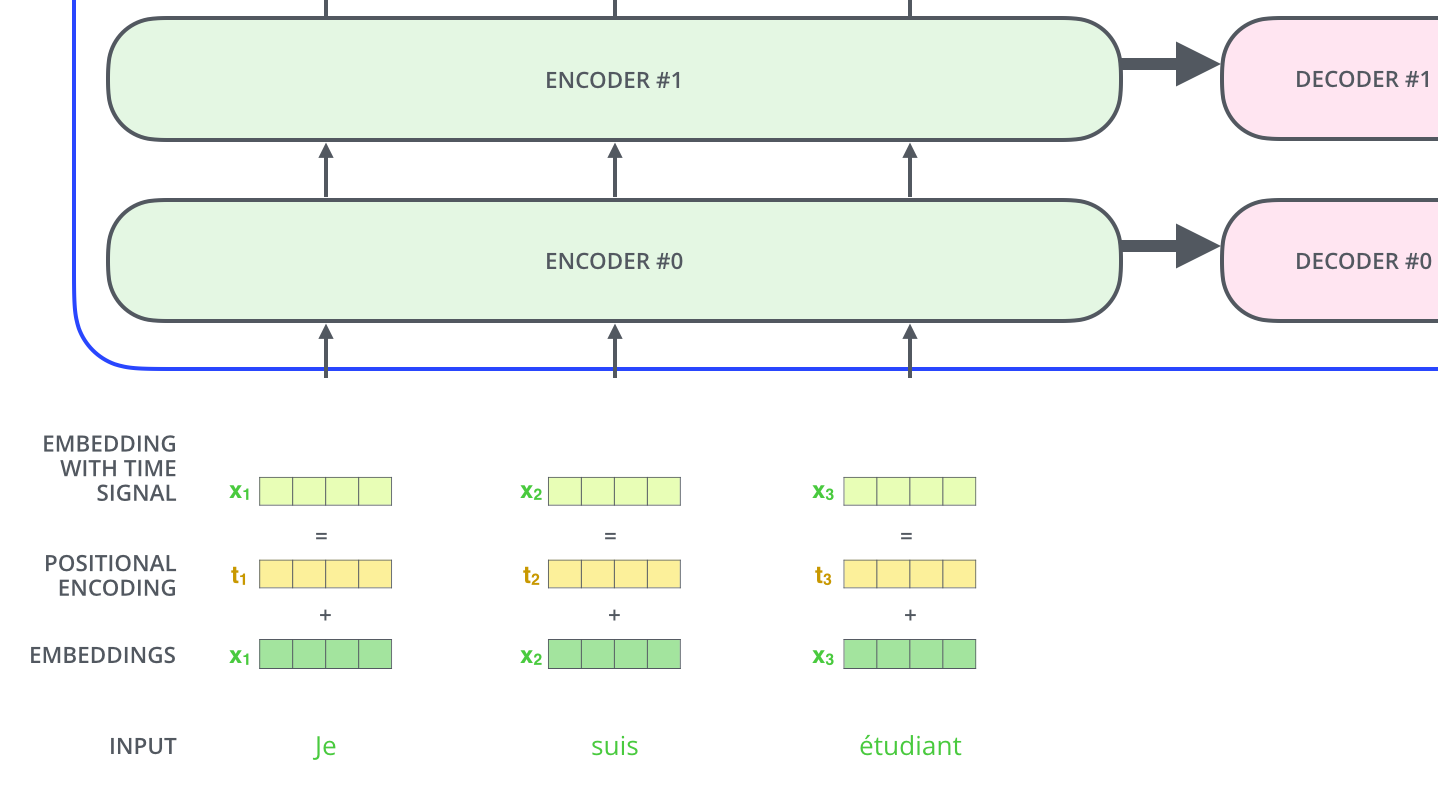

To give the model a sense of the order of the words, we add positional encoding vectors -- the values of which follow a specific pattern.

### The Residuals

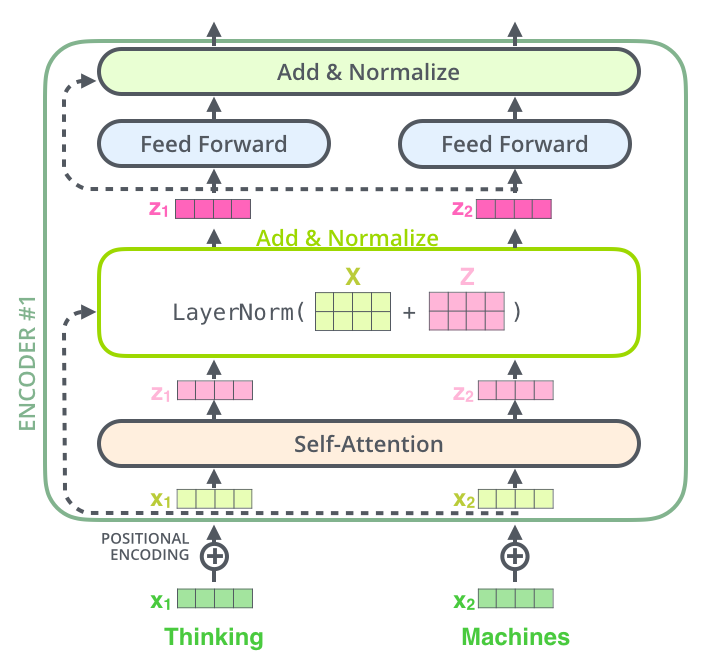

Sometimes specific self-Attention layer is not giving good response at that time we bypass the self-attention layer and directly given to Add&Normalize layer this concept is similar like dropout in neural network.

#### The Decoder Side

The encoder start by processing the input sequence. The output of the top encoder is then transformed into a set of attention vectors K and V. These are to be used by each decoder in its “encoder-decoder attention” layer which helps the decoder focus on appropriate places in the input sequence:

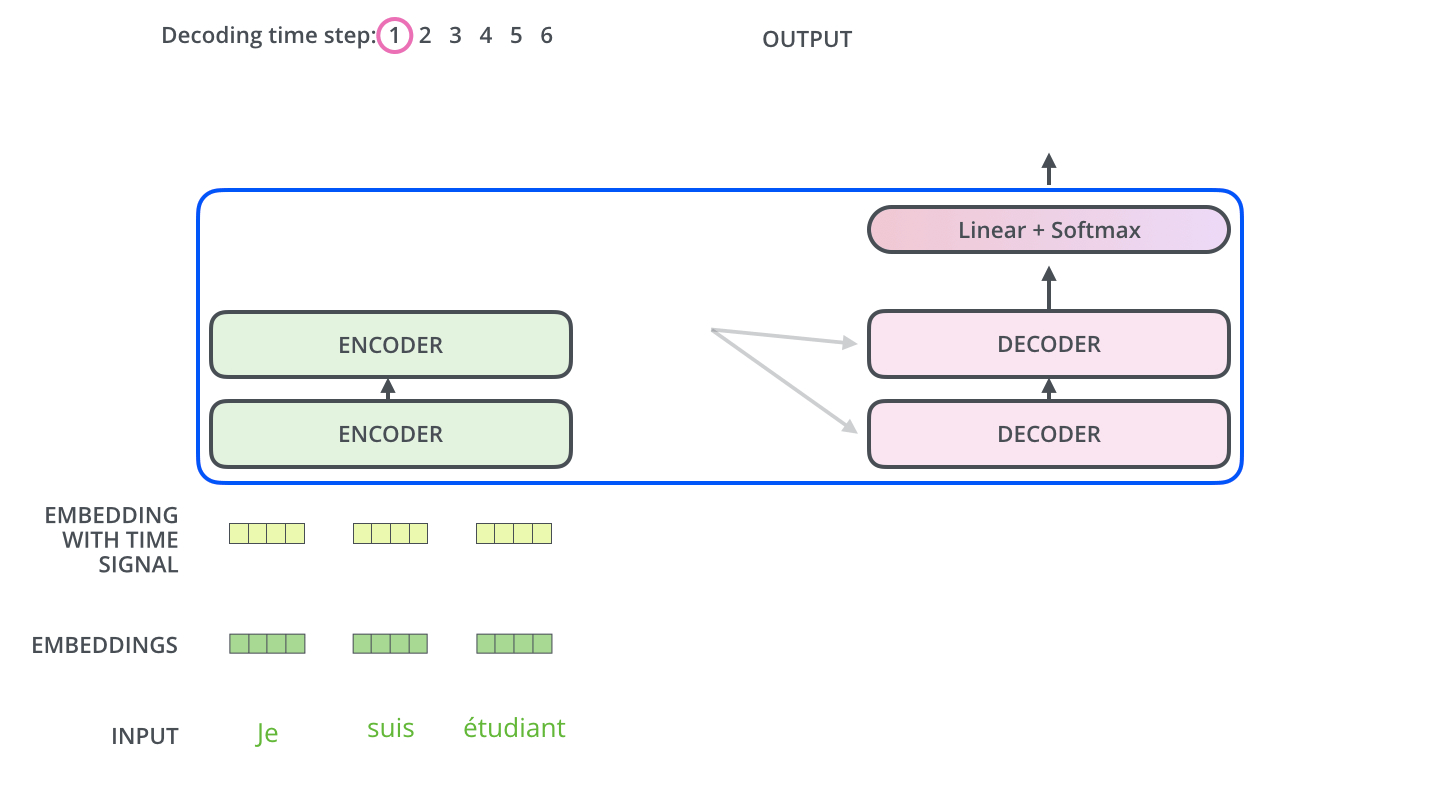

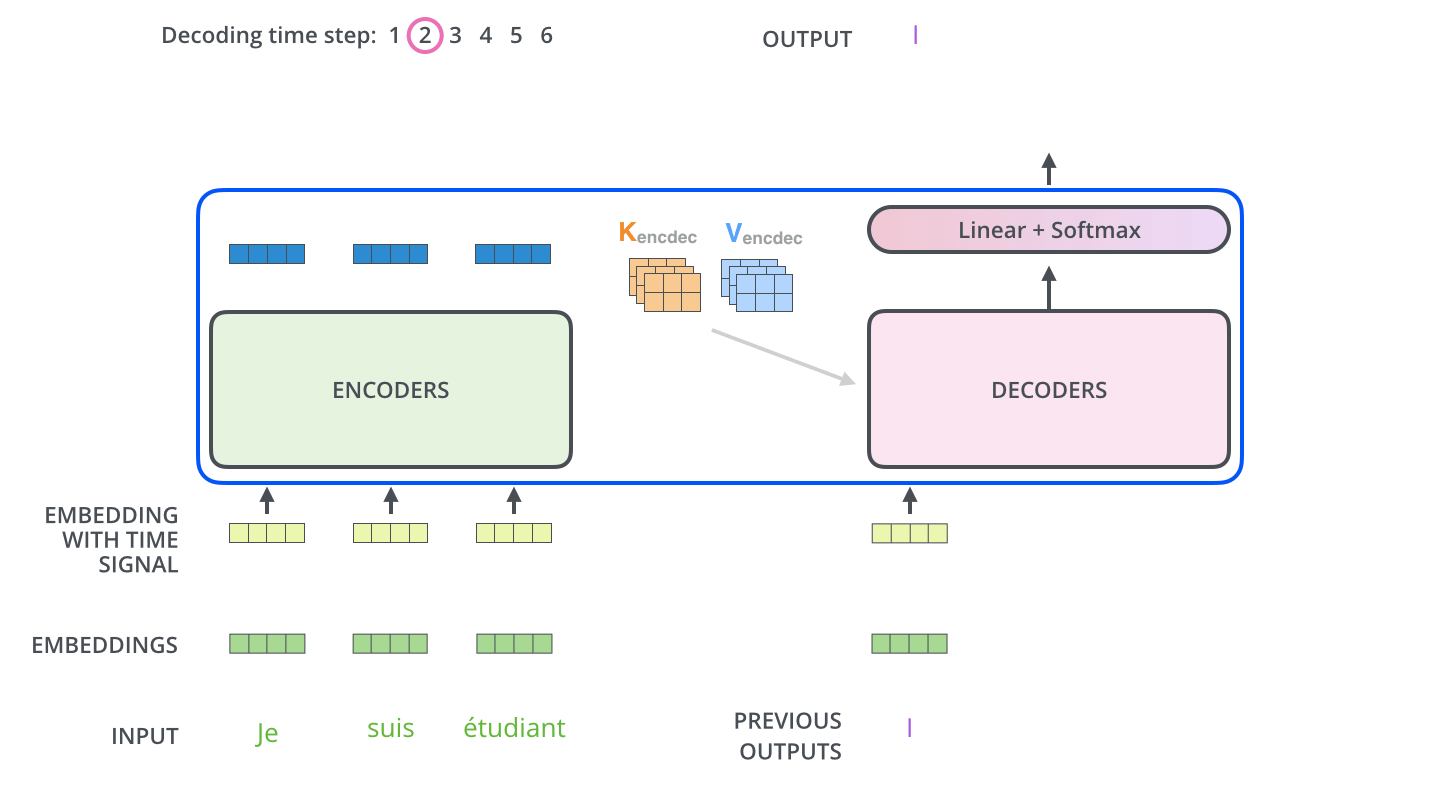

The following steps repeat the process until a special symbol is reached indicating the transformer decoder has completed its output. The output of each step is fed to the bottom decoder in the next time step, and the decoders bubble up their decoding results just like the encoders did. And just like we did with the encoder inputs, we embed and add positional encoding to those decoder inputs to indicate the position of each word.
The self attention layers in the decoder operate in a slightly different way than the one in the encoder:

In the decoder, the self-attention layer is only allowed to attend to earlier positions in the output sequence. This is done by masking future positions (setting them to -inf) before the softmax step in the self-attention calculation.

The “Encoder-Decoder Attention” layer works just like multiheaded self-attention, except it creates its Queries matrix from the layer below it, and takes the Keys and Values matrix from the output of the encoder stack.

As input given in encoder all vectors are give at same time parallelly but the output from decoder is in sequence by sequence with next time stamp.


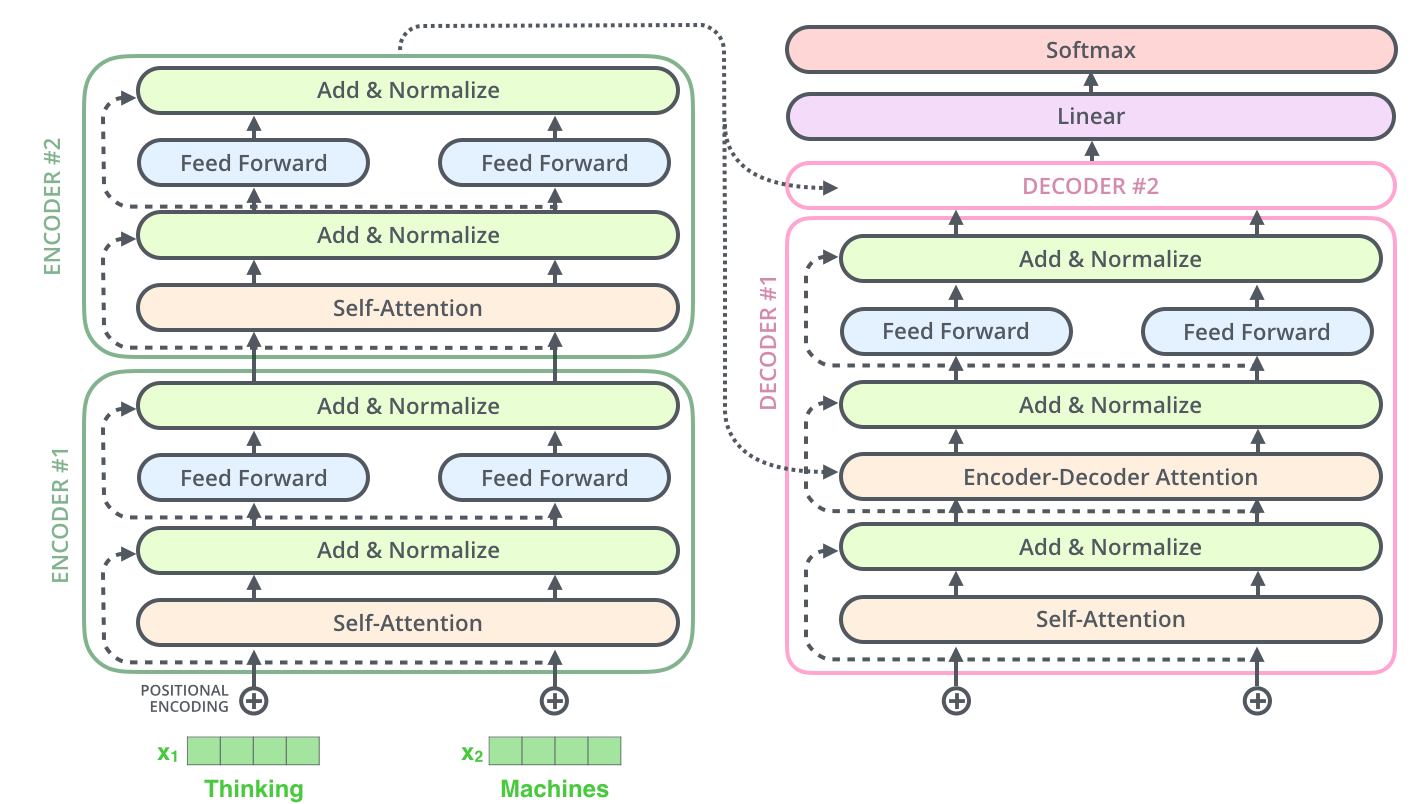

The output of decoder is given to the input of the decoder for next time stamp.Here Encoder-Decoder Attention works similar like Self-Attention only input is taken from Encoder as shown in above diagram.

### The Final Linear and Softmax Layer
The decoder stack outputs a vector of floats. How do we turn that into a word? That’s the job of the final Linear layer which is followed by a Softmax Layer.

The Linear layer is a simple fully connected neural network that projects the vector produced by the stack of decoders, into a much, much larger vector called a logits vector.

Let’s assume that our model knows 10,000 unique English words (our model’s “output vocabulary”) that it’s learned from its training dataset. This would make the logits vector 10,000 cells wide – each cell corresponding to the score of a unique word. That is how we interpret the output of the model followed by the Linear layer.

The softmax layer then turns those scores into probabilities (all positive, all add up to 1.0). The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.

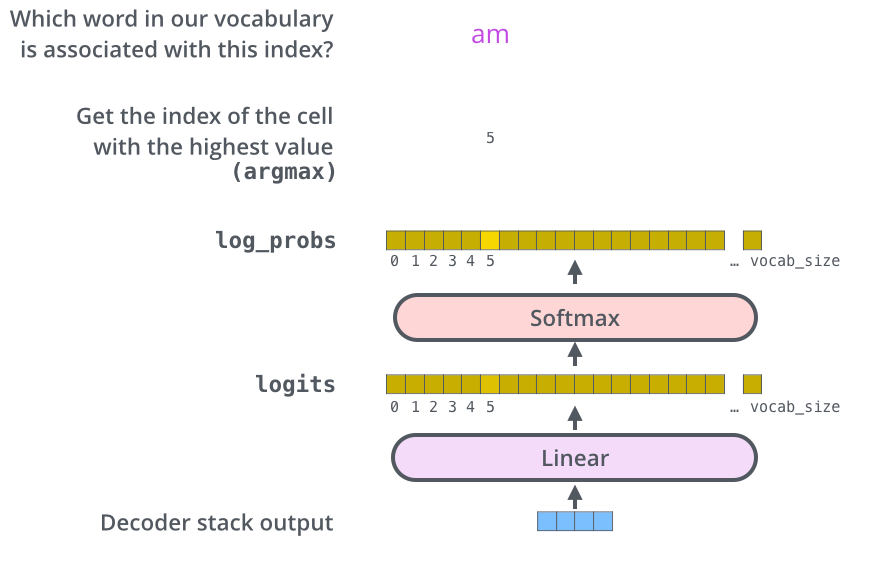

This figure starts from the bottom with the vector produced as the output of the decoder stack. It is then turned into an output word.

### Compare and contrast the GPT and BERT architectures. In what scenarios might you prefer one over the other?

GPT (Generative Pre-trained Transformer) and BERT (Bidirectional Encoder Representations from Transformers) are both powerful transformer-based architectures, but they differ in their objectives, training approaches, and use cases. Let's compare and contrast the GPT and BERT architectures:



### GPT (Generative Pre-trained Transformer):

1. **Objective:**
   - **Generative Model:** GPT is designed as a generative language model, trained to predict the next word in a sequence given the context of previous words. It is pre-trained to generate coherent and contextually relevant text.

2. **Training Approach:**
   - **Unidirectional Context:** GPT is trained in a left-to-right manner, meaning it attends to the context only from the left side of the current word during training.

3. **Architecture:**
   - **Decoder-Only:** GPT uses a decoder-only architecture. It has a stack of transformer decoder layers, and during fine-tuning, a task-specific output layer is added.

4. **Use Cases:**
   - **Text Generation:** GPT excels in text generation tasks, such as language modeling, story generation, and creative writing.
   - **Dialogue Systems:** It can be used for building conversational agents due to its ability to generate coherent and contextually relevant responses.



### BERT (Bidirectional Encoder Representations from Transformers):

1. **Objective:**
   - **Contextual Embeddings:** BERT is designed for bidirectional context understanding. It learns contextual embeddings for each word by considering both left and right context during training.

2. **Training Approach:**
   - **Masked Language Model (MLM):** BERT is trained using a masked language model, where random words are masked, and the model is trained to predict those masked words using both left and right context.

3. **Architecture:**
   - **Encoder:** BERT uses a bidirectional transformer encoder. It consists of stacked transformer encoder layers.

4. **Use Cases:**
   - **Embeddings for Downstream Tasks:** BERT embeddings are highly effective for a wide range of downstream tasks, such as text classification, named entity recognition, and question answering.
   - **Semantic Similarity:** BERT is suitable for tasks where understanding the contextual relationship between words or sentences is crucial.



### Comparison:

1. **Pre-training Objective:**
   - GPT: Next-word prediction in a left-to-right manner.
   - BERT: Bidirectional context understanding through masked language modeling.

2. **Training Approach:**
   - GPT: Unidirectional context during training.
   - BERT: Bidirectional context during training.

3. **Fine-Tuning:**
   - GPT: Fine-tuned for specific tasks by adding a task-specific output layer.
   - BERT: Fine-tuned for downstream tasks using task-specific architectures.

4. **Context Understanding:**
   - GPT: Captures context from the left side only.
   - BERT: Captures bidirectional context.



### Scenario Preferences:

- **GPT:**
  - Use when you need a generative language model.
  - Suitable for creative tasks, dialogue generation, and language understanding in a left-to-right context.

- **BERT:**
  - Use when you need context-aware embeddings for downstream tasks.
  - Suitable for tasks where bidirectional context understanding is crucial, such as text classification, question answering, and named entity recognition.

In summary, GPT is focused on generating coherent and contextually relevant text, while BERT excels in understanding bidirectional context for downstream tasks. The choice between them depends on the specific requirements of the task at hand.

# 2. Training:
### Describe the challenges and potential solutions of training very large models on distributed systems.


Training very large models on distributed systems poses several challenges, but it also offers potential solutions to address these issues. Here are some challenges and corresponding potential solutions:

Challenges:
1. Data Parallelism and Model Parallelism:

Challenge: Deciding how to split the model and data across distributed nodes can be complex.While smaller models can be trained on a light amount of data, as larger models were introduced, the demand for processing data has outgrown the computational power of the machinery. Eventually, it made more sense to distribute the machine learning workload across multiple machines instead of having a centralised system. The volume of data has increased to such an extent that it has become difficult to move or centralise. Or even in large enterprises where transaction processing is such an extensive process that the relevant data is stored in a different location, centralised solutions aren’t suitable. Distributed machine learning quickens the pace of training for neural networks by using a cluster of GPUs during training. When a model is fine-tuning hyperparameters, parallelised training looks through multiple configurations at the same time, which makes it faster.Deciding how to split the model and data across distributed nodes can be complex.

Solution: A combination of data parallelism and model parallelism can be employed. Data parallelism involves replicating the model on each node and splitting the data, while model parallelism involves splitting the model across nodes.The study also demonstrated that data parallelism is expected to have a scalability issue. Model parallelism seemed more apt for DNN models as a bigger number of GPUs was added. 
In a recent and prominent instance, Google AI’s large language model PaLM or Pathways Language Model used a combination of data and model parallelism as a part of its state-of-the-art training. The model was scaled using data parallelism at the Pod level across two Cloud TPU v4 Pods while each Pod used model parallelism with standard data.

2. Communication Overhead:

Challenge: Communication between nodes during training can become a bottleneck, leading to increased latency.During training, model parameters need to be updated based on gradients computed on different nodes.Ensuring that all nodes are synchronized in terms of model updates is crucial for the convergence of the training process.

Solution: Optimize communication patterns, use efficient communication libraries, and explore techniques like gradient accumulation to reduce the frequency of communication.Use techniques like asynchronous updates or gradient accumulation to reduce the frequency of parameter updates and mitigate the impact of communication delays.Employ efficient synchronization strategies, such as synchronous updates with overlapping communication and computation, or asynchronous updates with proper control to avoid divergence.

3. Synchronization Issues:

Challenge: Ensuring that the distributed nodes are synchronized in terms of model updates can be challenging.

Solution: Implement efficient synchronization strategies, such as asynchronous updates or synchronous updates with overlapping communication and computation.

4. Fault Tolerance:

Challenge: Distributed systems are susceptible to node failures, leading to potential data loss or model divergence.

Solution: Implement fault-tolerant mechanisms, like checkpointing and redundancy, to recover from node failures without significant disruption.

5. Scalability:

Challenge: Scaling the system efficiently with an increasing number of nodes can be challenging.

Solution: Use efficient scaling frameworks, distribute the workload evenly, and consider the impact of increased communication overhead with larger scales.

6. Resource Management:

Challenge: Managing resources such as GPUs, memory, and network bandwidth efficiently is crucial for optimal performance.

Solution: Implement resource-aware scheduling and monitoring systems to allocate resources dynamically based on the workload.

7. Data Distribution and Loading:

Challenge: Distributing and loading large datasets across nodes can be time-consuming.

Solution: Use distributed data loading techniques, such as sharding, and consider efficient data distribution strategies to minimize data transfer overhead.

##### Potential Solutions:
1. Parameter Servers:
Use parameter servers to centralize the storage of model parameters, reducing communication overhead.

2. Gradient Compression:
Compress gradients before communication to reduce the amount of data transferred between nodes.

3. Mixed Precision Training:
Utilize mixed precision training to reduce memory requirements and accelerate computation, especially on GPU architectures.

4. Distributed Batch Normalization:
Implement distributed versions of normalization layers to maintain consistency in statistics across nodes.

5. Dynamic Learning Rate Adjustment:
Adjust learning rates dynamically based on the progress of individual nodes to handle variations in convergence rates.

6. Pipeline Parallelism:
Divide the model into segments, and perform parallelism across these segments, which can help in utilizing resources more efficiently.

7. Distributed Training Libraries:
Leverage specialized distributed training libraries and frameworks, such as TensorFlow's tf.distribute and PyTorch's torch.distributed, which provide tools and abstractions for distributed training.

8. Auto-scaling:
Implement auto-scaling mechanisms to dynamically adjust the number of nodes based on the workload, ensuring optimal resource utilization.

### How would you address the issue of vanishing and exploding gradients in deep neural networks, especially in the context of transformers?

Vanishing Gradients:As more layers using certain activation functions are added to neural networks, the gradients of the loss function approaches zero, making the network hard to train.Certain activation functions, like the sigmoid function, squishes a large input space into a small input space between 0 and 1. Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small.

The simplest solution is to use other activation functions, such as ReLU, which doesn’t cause a small derivative.Other few parameters also play crucial role like:

Normalization Techniques:
Apply layer normalization or batch normalization after each layer to mitigate vanishing gradient problems. Normalization helps stabilize the activations throughout the network.

Skip Connections and Residual Connections:
Use skip connections (residual connections) to create shortcuts for gradient flow. This allows gradients to bypass certain layers, making it easier for the gradients to flow through the network.

Gradient Clipping:
Implement gradient clipping to limit the magnitude of gradients during backpropagation. This prevents gradients from becoming too small and helps mitigate vanishing gradient issues.

Initialization Strategies:
Use appropriate weight initialization techniques, such as Xavier/Glorot initialization or He initialization, to set initial weights in a way that avoids vanishing gradients during the early stages of training.

Gradient Checkpointing:
Implement gradient checkpointing, a technique that trades computation for memory, by selectively recomputing intermediate activations during the backward pass. This can help alleviate memory constraints and improve the flow of gradients.

# 3. Optimization & Regularization:
### Explain the mechanics of the Adam optimizer and why it's often preferred for training transformer models.


Adam is an adaptive learning rate algorithm designed to improve training speeds in deep neural networks and reach convergence quickly. It was introduced in the paper “Adam: A Method for Stochastic Optimization.” 

When introducing the algorithm, the authors list the attractive benefits of using Adam on non-convex optimization problems, as follows:

* Straightforward to implement.
* Computationally efficient.
* Little memory requirements.
* Invariant to diagonal rescale of the gradients.
* Well suited for problems that are large in terms of data and/or parameters.
* Appropriate for non-stationary objectives.
* Appropriate for problems with very noisy/or sparse gradients.
* Hyper-parameters have intuitive interpretation and typically require little tuning.

As Adam is adaptive extension of standard gradient descent it is represented by:

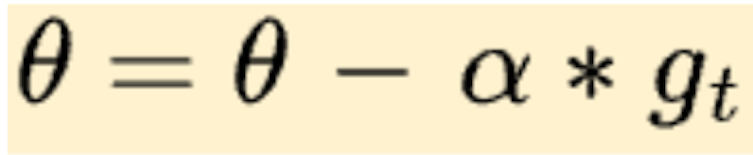

Here, θ = Model parameters, α = Learning rate, and gₜ = Gradient of the cost function with respect to the parameters.

This update changes the parameters θ in the negative direction of the gradient to minimize the cost function. The learning rate α determines the size of the step.

In the standard gradient descent algorithm, the learning rate α is fixed, meaning we need to start at a high learning rate and manually change the alpha by steps or by some learning schedule. A lower learning rate at the onset would lead to very slow convergence, while a very high rate at the start might miss the minima. 

Adam solves this problem by adapting the learning rate α for each parameter θ, enabling faster convergence compared to standard gradient descent with a constant global learning rate.

#### Advantages of Adam for Transformer Models:

1. Adaptive Learning Rates:
Adam adapts the learning rates for each parameter individually based on the historical gradients. This adaptiveness is beneficial for models with varying gradients and helps converge faster.

2. Momentum-Like Update:
The first moment term acts like a momentum term, allowing the optimizer to accumulate information about the gradient direction. This helps overcome local minima and accelerates convergence.

3. Bias Correction:
The bias correction step helps in the early stages of training when the estimates are biased towards zero. This correction ensures a more accurate estimation of the moments.

4. Efficient Memory Usage:
Adam's memory requirements are relatively modest compared to some other optimization algorithms, making it suitable for models with large parameter spaces, such as transformer models.

5. Default Hyperparameter Settings:
Adam has default hyperparameter settings (β1,β2,ϵ) that often work well across a wide range of tasks. This reduces the need for extensive hyperparameter tuning.

{α — Step size for the optimization.

β₁ — Decay rate for momentum. The typical value is 0.9 as we want to have high weighting for the most recent gradients.

β₂ — Decay rate for squared gradients. The typical value is 0.999. This is because 0.999 captures the long-term memory of gradients. We want a stable estimate of variance.

ϵ— Small value to prevent division by zero. It is usually around 1e-8.}

### Discuss methods for regularizing large models to avoid overfitting. How dotechniques like dropout or layer normalization play a role?


Regularization techniques are essential for preventing overfitting in large models. Overfitting occurs when a model learns the training data too well, capturing noise or irrelevant patterns, and performs poorly on new, unseen data.It is the condition where model performs well during training data which has low bias but fails to perform well during test data which has high variance.Here are some common regularization methods and how techniques like dropout and layer normalization contribute to addressing overfitting:

1. L1 and L2 Regularization:

* Idea: Add regularization terms to the loss function penalizing large weights (L2 regularization) or promoting sparsity (L1 regularization).

* Role: Helps prevent the model from becoming too complex and overly reliant on certain features.

2. Dropout:

* Idea: During training, randomly "drop out" a fraction of neurons (i.e., set their output to zero) at each update.

* Role: Introduces a form of model averaging, making the network more robust and preventing co-adaptation of hidden units.

3. Layer Normalization:

* Idea: Normalize the inputs of a layer to have zero mean and unit variance across the training data.

* Role: Acts as a regularizer by reducing internal covariate shift. It helps stabilize the training process and can have a similar effect to batch normalization.

4. Weight Sharing and Tying:

* Idea: Share weights between certain layers or parts of the model architecture.

* Role: Reduces the number of parameters and helps the model generalize better. It is often used in convolutional neural networks (CNNs) for weight sharing in convolutional layers.

5. Early Stopping:

* Idea: Monitor the model's performance on a validation set during training and stop when the performance starts to degrade.

* Role: Prevents the model from continuing to train and overfitting the training data.

6. DropConnect:

* Idea: An extension of dropout, where instead of dropping out entire neurons, individual weights are dropped during training.

* Role: Similar to dropout, it helps prevent the co-adaptation of weights and increases model robustness.

7. Gradient Clipping:

* Idea: Clip the gradients during backpropagation to prevent excessively large updates to model parameters.

* Role: Mitigates the impact of exploding gradients and helps stabilize training.

8. Ensemble Methods:

* Idea: Train multiple models and combine their predictions.There are different ensemble technique like Bagging, Boosting.

* Role: Ensemble methods, such as bagging or boosting, can help improve generalization by reducing the impact of individual model idiosyncrasies.

# 4. Data Processing:
### What are the challenges and strategies involved in preprocessing massive datasets for language model training?


Preprocessing massive datasets for language model training comes with a set of challenges due to the scale and complexity of the data. Here are some common challenges and strategies to address them:

### Challenges:

1. **Data Size:**
   - **Challenge:** Managing and processing very large datasets can strain computational resources and storage.
   - **Strategy:** Employ distributed processing frameworks (e.g., Apache Spark) for parallelized preprocessing. Use distributed storage systems and efficient data formats.

2. **Text Cleaning:**
   - **Challenge:** Raw text data often contains noise, special characters, and formatting issues.
   - **Strategy:** Develop robust text cleaning pipelines to remove irrelevant elements. Utilize regular expressions, NLP libraries, and custom rules for effective cleaning.

3. **Tokenization:**
   - **Challenge:** Tokenizing massive text corpora can be computationally intensive and memory-demanding.
   - **Strategy:** Leverage parallel tokenization techniques and optimized tokenization libraries. Explore subword tokenization methods for handling large vocabularies more efficiently.

4. **Vocabulary Size:**
   - **Challenge:** Managing large vocabularies can lead to memory constraints and slow training.
   - **Strategy:** Use subword tokenization to handle rare words efficiently. Limit the vocabulary size based on the available computational resources. Experiment with techniques like byte pair encoding (BPE) for adaptive vocabulary sizing.

5. **Parallelization:**
   - **Challenge:** Parallelizing preprocessing tasks introduces complexities, especially with dependencies.
   - **Strategy:** Use distributed computing frameworks or parallel processing libraries to process data concurrently. Divide the dataset into manageable partitions for parallel execution.

6. **Memory Constraints:**
   - **Challenge:** Loading massive datasets into memory may not be feasible.
   - **Strategy:** Implement streaming or batch processing to load and preprocess data in smaller chunks. Use data generators or pipelines to load data on-the-fly during training.

7. **Handling Long Sequences:**
   - **Challenge:** Sequences in massive datasets can be very long, leading to increased memory requirements.
   - **Strategy:** Implement sequence truncation or padding to manage sequence lengths. Explore models with efficient handling of long sequences, such as attention mechanisms with memory constraints.

8. **Data Augmentation:**
   - **Challenge:** Generating augmented data at scale can be computationally expensive.
   - **Strategy:** Use efficient data augmentation techniques, balancing the generation of augmented data with the original dataset to prevent overfitting.

9. **Balancing Datasets:**
   - **Challenge:** Imbalanced datasets can lead to biased language models.
   - **Strategy:** Employ techniques like oversampling minority classes or using class weights during training to balance the dataset.

10. **Multilingual Considerations:**
    - **Challenge:** Processing massive multilingual datasets requires handling diverse languages, scripts, and character encodings.
    - **Strategy:** Implement language identification to preprocess different languages separately. Standardize character encodings to ensure consistency.

### Conclusion:

The challenges in preprocessing massive datasets for language model training often involve finding a balance between computational efficiency and maintaining data quality. Leveraging distributed computing, parallel processing, and optimized tokenization techniques can contribute to effective preprocessing. It's essential to adapt strategies based on the characteristics of the dataset and the available computational resources. Regular testing and experimentation are crucial for identifying the most effective preprocessing methods for a given scenario.

### How would you handle multilingual or code-switched data in your training pipeline?

Handling multilingual or code-switched data in a training pipeline involves addressing the unique challenges posed by the presence of multiple languages within the same dataset. Here are strategies to handle multilingual or code-switched data effectively:

### 1. **Language Identification:**
   - **Strategy:** Implement language identification techniques to identify the language of each text segment. This helps in separating the data into language-specific subsets.

### 2. **Language-Specific Preprocessing:**
   - **Strategy:** Customize preprocessing steps based on the identified language. Different languages may require specific tokenization methods, stemming, or stop-word removal.

### 3. **Language-Conditional Models:**
   - **Strategy:** Train separate language-specific models or use language-conditioned embeddings to capture language-specific patterns effectively.

### 4. **Parallel Training:**
   - **Strategy:** If resources permit, train separate models for each language concurrently. This allows each model to specialize in a particular language.

### 5. **Adaptive Vocabulary Sizing:**
   - **Strategy:** Utilize subword tokenization techniques, such as Byte Pair Encoding (BPE) or SentencePiece, to create adaptive vocabularies that handle varying word structures across languages.

### 6. **Data Augmentation:**
   - **Strategy:** Generate augmented data for each language independently. Consider using language-specific data augmentation techniques.

### 7. **Code-Switching Detection:**
   - **Strategy:** If dealing with code-switched data, develop or use existing models to identify code-switching points in the text. This can guide the preprocessing and model training steps.

### 8. **Embedding Alignment:**
   - **Strategy:** If using pre-trained word embeddings, ensure that embeddings for words in different languages are aligned. Techniques like cross-lingual word embeddings or mapping-based methods can be applied.

### 9. **Transfer Learning:**
   - **Strategy:** Leverage pre-trained language models on a large multilingual corpus (e.g., mBERT) and fine-tune on the code-switched or domain-specific data. Transfer learning helps capture general linguistic features.

### 10. **Ensemble Approaches:**
     Strategy: Train separate models for each language or language combination and create an ensemble model for making predictions. This can improve overall performance.

### 11. **Data Balancing:**
     Strategy: Ensure that the dataset is balanced with respect to the distribution of languages. Use sampling techniques to handle imbalances if necessary.

### 12. **Evaluation Metrics:**
     Strategy: Choose appropriate evaluation metrics that consider the multilingual or code-switched nature of the data. Metrics like macro-average F1 score may be more suitable in such cases.

### 13. **Fine-Tuning and Domain Adaptation:**
     Strategy: Fine-tune models on specific code-switching or multilingual datasets to adapt them to the domain-specific linguistic patterns.

### 14. **Continuous Monitoring:**
     Strategy: Continuously monitor model performance on each language and make adjustments to the training pipeline as needed. Regularly update language models and embeddings.

### Conclusion:
Handling multilingual or code-switched data requires a thoughtful combination of language identification, language-specific preprocessing, and tailored model training strategies. Flexibility in adapting to diverse linguistic patterns and leveraging advanced techniques such as transfer learning or ensemble approaches can enhance the performance of models on multilingual or code-switched datasets. Regular evaluation and iteration based on specific domain requirements are essential for success.

# 5. Evaluation & Benchmarks:
###  What are some key metrics for evaluating the performance of a language model? Discuss both quantitative and qualitative evaluations.

Evaluating the performance of a language model involves considering a range of metrics that cover both quantitative and qualitative aspects. These metrics help assess how well the model performs on specific tasks and provide insights into its strengths and weaknesses. Here are key metrics for evaluating language model performance:

### Quantitative Metrics:

1. **Accuracy:**
   - **Definition:** The ratio of correctly predicted instances to the total number of instances.
   - **Applicability:** Commonly used for classification tasks, sentiment analysis, and named entity recognition.

2. **Precision, Recall, and F1 Score:**
   - **Precision:** The ratio of true positives to the sum of true positives and false positives.
   - **Recall (Sensitivity):** The ratio of true positives to the sum of true positives and false negatives.
   - **F1 Score:** The harmonic mean of precision and recall.
   - **Applicability:** Useful for tasks like text classification, information retrieval, and named entity recognition.

3. **BLEU Score:**
   - **Definition:** Measures the quality of machine-generated text by comparing it to a set of reference texts.
   - **Applicability:** Commonly used for machine translation and text generation tasks.

4. **Perplexity:**
   - **Definition:** A measure of how well the probability distribution predicted by the model matches the true distribution.
   - **Applicability:** Frequently used in language modeling tasks.

5. **Mean Squared Error (MSE):**
   - **Definition:** Measures the average squared difference between predicted and true values.
   - **Applicability:** Commonly used in regression tasks, such as predicting numerical values.

6. **ROUGE (Recall-Oriented Understudy for Gisting Evaluation) Score:**
   - **Definition:** Measures the overlap between generated and reference texts in terms of n-grams.
   - **Applicability:** Widely used in text summarization and machine translation evaluation.

### Qualitative Metrics:

1. **Human Evaluation:**
   - **Definition:** Involves obtaining subjective assessments from human annotators on aspects like fluency, coherence, and relevance.
   - **Applicability:** Provides insights into overall quality and user satisfaction for tasks like text generation and summarization.

2. **Diversity of Output:**
   - **Definition:** Measures how diverse the generated outputs are for a given prompt.
   - **Applicability:** Relevant for tasks like text generation to avoid repetitive or biased responses.

3. **Saliency Analysis:**
   - **Definition:** Analyzes the model's attention mechanisms to understand which parts of the input text the model focuses on during generation.
   - **Applicability:** Useful for tasks like machine translation or text summarization to ensure the model attends to relevant information.

4. **Bias Analysis:**
   - **Definition:** Assesses the presence of biases in the model's outputs, particularly concerning gender, race, or other sensitive attributes.
   - **Applicability:** Important for fairness and ethical considerations in natural language processing applications.

5. **Error Analysis:**
   - **Definition:** Investigates specific cases where the model fails to perform well, identifying patterns or common errors.
   - **Applicability:** Helps understand model limitations and areas for improvement.

6. **Sample Generation:**
   - **Definition:** Manually reviewing samples of generated text to assess fluency, coherence, and relevance.
   - **Applicability:** Offers qualitative insights into the model's language generation capabilities.

### Conclusion:

Both quantitative and qualitative metrics are essential for a comprehensive evaluation of language models. While quantitative metrics provide objective numerical measures, qualitative metrics offer deeper insights into the model's behavior and potential limitations. A holistic evaluation strategy often combines these metrics to ensure a nuanced understanding of a language model's performance.

### Describe the methodology behind designing a benchmark for language models. What are some existing benchmarks, and what might their limitations be?

Designing a benchmark for language models involves creating a standardized set of tasks and datasets to evaluate the models' performance systematically. The goal is to provide a fair and comprehensive assessment of a language model's capabilities. Here's a general methodology for designing a benchmark for language models:

### Methodology for Benchmark Design:

1. **Task Selection:**
   - Identify a set of diverse language tasks that cover different aspects of language understanding and generation. Tasks may include:
     - Text classification.
     - Named entity recognition.
     - Question answering.
     - Text summarization.
     - Language modeling.
     - Sentiment analysis.
   - Ensure a mix of tasks that span various linguistic complexities.

2. **Dataset Collection:**
   - Curate datasets for each selected task, ensuring they are representative of real-world scenarios. Datasets should cover a range of domains, genres, and languages.
   - Include standard benchmark datasets used in the natural language processing (NLP) community, and consider constructing new datasets if needed.

3. **Evaluation Metrics:**
   - Define appropriate evaluation metrics for each task to measure the model's performance objectively. Common metrics include accuracy, precision, recall, F1 score, BLEU score, and perplexity.
   - Choose metrics that align with the goals of each specific task and avoid misleading results.

4. **Train/Dev/Test Splits:**
   - Establish clear train, development (dev), and test splits for each dataset. Ensure that data in these splits are distinct and representative.
   - Use a consistent methodology for splitting data across all tasks to maintain fairness.

5. **Baseline Models:**
   - Implement baseline models that represent standard approaches for each task. These can include rule-based systems, traditional machine learning models, or simpler neural network architectures.
   - Baselines provide a reference point for comparing the performance of more advanced models.

6. **Scaling Complexity:**
   - Include tasks with varying levels of complexity, from simple token-level classification to more intricate tasks like document-level summarization.
   - Scaling complexity helps assess a model's ability to handle different linguistic challenges.

7. **Adversarial Examples:**
   - Introduce adversarial examples or challenging cases for certain tasks to evaluate the robustness of models against potential real-world variations.

8. **Cross-Domain Evaluation:**
   - Consider including cross-domain evaluation to assess a model's generalization across different domains.

### Existing Benchmarks and Limitations:

Several existing benchmarks have been widely adopted in the NLP community:

1. **GLUE (General Language Understanding Evaluation):**
   - A benchmark comprising multiple NLP tasks, such as textual entailment, sentiment analysis, and question answering. However, it has been criticized for potential shortcomings in capturing diverse language understanding capabilities.

2. **SuperGLUE:**
   - An extension of GLUE that includes more challenging tasks and aims to address some of the limitations of GLUE.

3. **SQuAD (Stanford Question Answering Dataset):**
   - Focused on question answering, SQuAD evaluates a model's ability to generate precise and contextually relevant answers. It has been influential in advancing research on reading comprehension.

4. **COCO (Common Objects in COntext):**
   - A dataset for image captioning, assessing a model's ability to generate descriptive captions for images.

5. **WMT (Workshop on Machine Translation) Benchmarks:**
   - Evaluates machine translation models across multiple languages. Common metrics include BLEU score.

### Limitations of Existing Benchmarks:

1. **Lack of Diversity:**
   - Many benchmarks may not adequately represent the diversity of languages, domains, and tasks encountered in real-world applications.

2. **Task-Specific Focus:**
   - Some benchmarks may focus on specific tasks, potentially neglecting broader language understanding abilities.

3. **Overemphasis on Metrics:**
   - Relying solely on specific evaluation metrics may not provide a comprehensive understanding of a model's capabilities. It's essential to interpret results with caution and consider qualitative aspects.

4. **Insensitive to Model Biases:**
   - Benchmarks may not adequately capture and evaluate biases present in language models, potentially leading to biased outcomes.

5. **Lack of Continual Learning Scenarios:**
   - Most benchmarks are designed for static evaluation rather than assessing a model's ability to continually learn from new data.

Designing benchmarks that address these limitations and incorporating a broader set of tasks, domains, and languages will contribute to more comprehensive evaluations of language models. Continuous community efforts are essential for evolving benchmarks to keep pace with advancements in language understanding and generation.

# 6. Model Efficiency:
### How would you approach compressing a trained language model without sacrificing too much performance?


Compressing a trained language model without sacrificing too much performance is crucial for deploying models in resource-constrained environments, such as mobile devices or edge devices. Here are several approaches to achieve model compression while preserving performance:

### 1. **Quantization:**
   - **Idea:** Reduce the precision of the model's weights and activations, typically from 32-bit floating-point to lower bit precision (e.g., 8-bit integers).
   - **Benefits:** Reduces memory footprint and accelerates inference on hardware with limited precision support.
   - **Considerations:** Fine-tune the quantized model to mitigate accuracy loss. Some frameworks provide built-in support for quantization.

### 2. **Pruning:**
   - **Idea:** Remove unimportant connections (weights) or neurons from the model, either during training (structured pruning) or post-training (unstructured pruning).
   - **Benefits:** Reduces the number of parameters and computations, leading to a more compact model.
   - **Considerations:** Pruning can be combined with fine-tuning to recover any lost accuracy.

### 3. **Knowledge Distillation:**
   - **Idea:** Train a smaller, student model to mimic the behavior of a larger, teacher model. The student model learns from both the ground truth labels and the teacher's soft predictions.
   - **Benefits:** Reduces model size while maintaining performance by transferring knowledge from a larger model.
   - **Considerations:** Choose an appropriate temperature parameter for the softmax function in the teacher model to control the balance between hard and soft targets.

### 4. **Weight Sharing:**
   - **Idea:** Share weights among different parts of the model or across layers.
   - **Benefits:** Reduces the number of unique weights, leading to a more compact model.
   - **Considerations:** The choice of which weights to share requires careful consideration to minimize impact on performance.

### 5. **Knowledge Pruning:**
   - **Idea:** Remove knowledge from the model that is redundant or less critical for performance.
   - **Benefits:** Reduces model size without significant loss of performance.
   - **Considerations:** Identify and quantify less critical knowledge to be pruned, possibly using techniques like attention pruning.

### 6. **Factorized Convolution:**
   - **Idea:** Decompose large convolutional filters into smaller factorized filters.
   - **Benefits:** Reduces the number of parameters and computations in convolutional layers.
   - **Considerations:** Choose appropriate decomposition techniques, such as depthwise separable convolutions.

### 7. **Distillation with Quantization:**
   - **Idea:** Combine knowledge distillation with quantization to train a smaller model with quantized weights.
   - **Benefits:** Achieves both the benefits of knowledge distillation and quantization.
   - **Considerations:** Adjust hyperparameters to balance the trade-off between model size and performance.

### 8. **Layer Factorization:**
   - **Idea:** Factorize weight matrices of fully connected layers into smaller matrices.
   - **Benefits:** Reduces the number of parameters in fully connected layers.
   - **Considerations:** Choose appropriate factorization techniques, such as low-rank approximations.

### 9. **Dynamic Inference:**
   - **Idea:** Use dynamic precision during inference, adjusting precision based on the computational resources available.
   - **Benefits:** Adapts to the available hardware resources while maintaining accuracy.
   - **Considerations:** Implement a dynamic precision scheme that minimizes the impact on performance.

### 10. **Use of Lightweight Architectures:**
   - **Idea:** Use inherently lightweight architectures, such as MobileNet or TinyBERT, designed for efficient inference.
   - **Benefits:** Achieves good performance with a smaller model footprint.
   - **Considerations:** Select architectures optimized for the specific requirements of the deployment environment.

### Conclusion:
The choice of compression technique depends on the specific requirements of the deployment scenario. A combination of these techniques, along with careful fine-tuning and evaluation, can result in a compressed language model that meets performance criteria while being suitable for resource-constrained environments. Experimentation and thorough analysis are key to finding the right balance between model size and performance.

### Discuss the benefits and trade-offs of techniques like knowledge distillation, pruning, and quantization.

Various techniques, such as knowledge distillation, pruning, and quantization, are employed to compress and optimize trained language models. Each technique comes with its own set of benefits and trade-offs, and the choice depends on the specific requirements of the deployment environment. Let's discuss the advantages and potential trade-offs of each technique:

### 1. Knowledge Distillation:

#### Benefits:
- **Model Compression:** Knowledge distillation allows for the transfer of knowledge from a larger teacher model to a smaller student model, leading to a more compact representation of information.
- **Improved Generalization:** The student model, by learning from the softer probability distributions produced by the teacher model, can generalize better on unseen data.
- **Faster Inference:** Smaller models produced through distillation often lead to faster inference times, making them suitable for deployment in resource-constrained environments.

#### Trade-offs:
- **Information Loss:** Distillation involves simplifying the information present in the teacher model, which may result in a loss of fine-grained details and nuances.
- **Complexity:** Designing an effective knowledge distillation setup requires careful tuning of hyperparameters and the choice of appropriate training strategies.

### 2. Pruning:

#### Benefits:
- **Model Size Reduction:** Pruning removes unimportant connections (weights) or neurons, resulting in a more compact model with fewer parameters.
- **Computational Efficiency:** Smaller models require fewer computations during both training and inference, leading to improved computational efficiency.
- **Resource Savings:** Pruned models are more memory-efficient, making them suitable for deployment on devices with limited resources.

#### Trade-offs:
- **Fine-tuning Overhead:** Pruning may necessitate fine-tuning to recover any accuracy lost during the pruning process.
- **Sensitivity to Initialization:** The success of pruning can be sensitive to the initialization of weights and the choice of pruning criteria.

### 3. Quantization:

#### Benefits:
- **Memory Reduction:** Quantization reduces the precision of weights and activations, resulting in a smaller memory footprint.
- **Faster Inference:** Reduced precision accelerates inference, making quantized models suitable for real-time applications.
- **Energy Efficiency:** Models with lower precision typically require less energy for computation, making them energy-efficient.

#### Trade-offs:
- **Accuracy Degradation:** Lower precision may lead to a loss of model accuracy. Fine-tuning or additional training may be needed to mitigate this impact.
- **Implementation Complexity:** Implementing quantization may introduce challenges related to numerical stability and compatibility with certain hardware platforms.

### Conclusion:

The choice between knowledge distillation, pruning, and quantization involves a trade-off between model size, computational efficiency, and accuracy. The best approach often depends on the specific requirements of the deployment scenario. In many cases, a combination of these techniques may be used to strike a balance between achieving a compact model and preserving acceptable performance. Careful experimentation, evaluation, and consideration of the target platform constraints are essential to make informed decisions regarding model compression techniques.

# 7. Ethics & Biases:
### How do large language models inherit biases from their training data? Provide specific examples.


Large language models inherit biases from their training data due to the nature of the data they are exposed to during the training process. These biases can emerge from the underlying biases present in the training data, which often reflects societal biases, cultural norms, and historical inequalities. Here are some ways biases can be inherited by large language models:

### 1. **Biased Training Data:**
   - **Example:** If training data contains biased or unrepresentative samples, the model may learn and perpetuate those biases. For instance, if a language model is trained on a corpus with gender-biased text, it might associate certain occupations or roles with specific genders.

### 2. **Stereotypical Associations:**
   - **Example:** If training data contains stereotypical associations between certain groups and attributes, the model may learn and reinforce these associations. For instance, associating specific ethnic or racial groups with particular traits or occupations.

### 3. **Underrepresented Groups:**
   - **Example:** If certain groups are underrepresented in the training data, the model may not generalize well to those groups, leading to biased predictions. For example, a model trained on biased news articles may not accurately represent the perspectives of minority communities.

### 4. **Historical Biases:**
   - **Example:** Language models trained on historical text may perpetuate biases present in that historical context. This could include biased views on gender roles, racial stereotypes, or discriminatory language.

### 5. **Contextual Biases:**
   - **Example:** Biases can arise from the context in which the language model is trained. For instance, if the training data includes biased social media content, the model may learn and reproduce the biases prevalent in those platforms.

### 6. **Amplification of Stereotypes:**
   - **Example:** Language models may inadvertently amplify stereotypes present in the training data. For instance, associating specific occupations with certain genders or perpetuating cultural stereotypes.

### 7. **Language Ambiguity:**
   - **Example:** Ambiguous language in the training data may lead to the model learning biased interpretations. For instance, if a language model is exposed to ambiguous statements with potential gender or racial bias, it may learn to make biased predictions.

### 8. **User Feedback Loops:**
   - **Example:** If language models are fine-tuned based on user interactions that reflect biased preferences, the model may become biased towards those preferences. For example, biased search results or autocomplete suggestions based on user queries.

### Mitigating Bias in Language Models:

1. **Diverse and Representative Training Data:**
   - Ensure training data is diverse, representative, and free from biased content.

2. **Bias Audits and Evaluation:**
   - Regularly conduct bias audits to identify and mitigate biases in language models.

3. **Debiasing Techniques:**
   - Implement debiasing techniques during training to reduce the impact of biased patterns.

4. **Fairness-aware Training:**
   - Train models with fairness-aware objectives to explicitly address and minimize biases.

5. **User Feedback Monitoring:**
   - Continuously monitor and analyze user feedback to identify and rectify biased model behaviors.

6. **Transparency and Explainability:**
   - Design models with transparency and explainability features to understand and interpret model decisions.

Addressing biases in language models is an ongoing challenge, requiring a combination of technological, ethical, and societal considerations. It's crucial to actively work towards minimizing biases to ensure the responsible deployment of language models in various applications.

### What strategies can be employed to identify and mitigate these biases during model training or post-training?

Identifying and mitigating biases in language models during or after training is essential for developing models that are fair, unbiased, and aligned with ethical considerations. Here are strategies that can be employed to address biases:

### Strategies for Identifying Biases:

1. **Bias Auditing:**
   - Regularly audit the training data and model outputs to identify potential biases. Assess the representation of different groups and topics in the data.

2. **Diversity and Representativeness:**
   - Ensure training data is diverse and representative of the population it aims to serve. Include examples from various demographic groups to minimize underrepresentation.

3. **Bias Indicators:**
   - Identify potential bias indicators in the training data, such as gendered language, stereotypical associations, or cultural biases.

4. **User Feedback Analysis:**
   - Analyze user feedback to identify cases where the model may exhibit biased behavior. Monitor feedback from diverse user groups.

5. **Contextual Analysis:**
   - Understand the context in which the model is used. Consider the impact of contextual factors on bias, such as language ambiguity or cultural differences.

6. **Fairness Metrics:**
   - Define and use fairness metrics to quantify and measure bias in model predictions. Common fairness metrics include disparate impact, equalized odds, and demographic parity.

### Strategies for Mitigating Biases:

1. **Diverse Training Data:**
   - Curate training data to ensure diversity and representation. Include examples that cover a wide range of demographic, cultural, and social contexts.

2. **Bias-aware Feature Engineering:**
   - Consider adding features to the model that explicitly account for sensitive attributes (e.g., gender, race). This allows the model to learn and adapt to different subgroups.

3. **Debiasing Techniques:**
   - Incorporate debiasing techniques during training to mitigate biases. These techniques may include adversarial training, re-weighting of examples, or explicit penalty terms for biased predictions.

4. **Adversarial Training:**
   - Train the model in an adversarial manner, introducing counterexamples to mitigate biases. This involves training the model and an adversary simultaneously.

5. **Regularization:**
   - Apply regularization techniques that penalize the model for learning overly complex or biased patterns. This helps prevent the model from fitting to biases present in the training data.

6. **Bias Correction:**
   - Implement post-processing steps to correct biased predictions. This involves adjusting model outputs to align them with fairness goals.

7. **Fair Representation Learning:**
   - Use techniques for fair representation learning that aim to disentangle sensitive attributes from the learned representations.

8. **User Interface Design:**
   - Design user interfaces that provide transparency into model decisions, allowing users to understand how the model arrived at a particular prediction.

9. **Continual Monitoring:**
   - Continuously monitor the model's behavior in production to detect and address emerging biases. Implement mechanisms for regular model updates.

10. **Ethics Review:**
    - Establish an ethics review process involving multidisciplinary teams to evaluate and address potential biases at various stages of model development.

### Conclusion:

Addressing biases in language models requires a multi-faceted approach that spans data collection, model training, and ongoing monitoring. It's crucial to integrate fairness considerations into the development pipeline and adopt strategies that promote ethical and responsible AI practices. Regularly updating models, incorporating diverse perspectives, and engaging in transparent communication are essential components of a comprehensive strategy to identify and mitigate biases in language models.

# 8. Transfer Learning & Fine-tuning:
### Explain the concept of transfer learning and how it's particularly relevant in the context of large language models.


Transfer learning is a machine learning paradigm where a model trained on one task is adapted for a second, related task. In the context of large language models, transfer learning has proven to be particularly effective and relevant. Here's an explanation of the concept of transfer learning and its relevance in the context of large language models:

### Concept of Transfer Learning:

1. **Pre-training:**
   - In transfer learning, a model is first pre-trained on a large dataset and a related task. This initial task is typically chosen to be general enough to capture a broad understanding of the data. For language models, this could involve training on a vast corpus of text data, predicting the next word in a sentence (language modeling), or other language-related tasks.

2. **Learning Generic Representations:**
   - During pre-training, the model learns generic representations and features that are useful for understanding the underlying structure and semantics of the data. The model develops an understanding of language syntax, grammar, and context.

3. **Transfer to Specific Task:**
   - After pre-training, the knowledge gained by the model is transferred to a target task, which may involve a smaller dataset and a more specific objective. The pre-trained model serves as a starting point, and the learning is fine-tuned on the target task to adapt the model to the nuances of the new data.

### Relevance in the Context of Large Language Models:

1. **Data Efficiency:**
   - Large language models, such as those based on transformer architectures, require substantial amounts of data to train effectively. Transfer learning allows these models to leverage pre-existing knowledge from diverse and extensive datasets, making them more data-efficient.

2. **Generalization:**
   - Pre-training on a diverse set of language tasks enables models to capture general linguistic patterns and semantics. This generalization allows the model to perform well on a wide range of downstream tasks without requiring task-specific training from scratch.

3. **Domain Adaptation:**
   - Transfer learning facilitates domain adaptation. Large language models pre-trained on a general corpus can be fine-tuned on domain-specific data, allowing them to adapt to the intricacies of specialized language domains, such as medical, legal, or technical language.

4. **Resource Efficiency:**
   - Training large language models from scratch demands significant computational resources. Transfer learning mitigates this by allowing models to leverage pre-trained weights, reducing the computational cost of training on specific tasks.

5. **Addressing Data Scarcity:**
   - In scenarios where labeled data is scarce for a specific task, transfer learning helps overcome the limitations by using the knowledge gained from pre-training to bootstrap the learning process on the target task.

6. **Continuous Learning:**
   - Large language models can be continuously updated and fine-tuned on new data. This adaptability ensures that models stay current and relevant as language evolves over time.

7. **Facilitating Model Deployment:**
   - Pre-trained language models serve as powerful starting points for various natural language processing applications. Transfer learning makes it easier to deploy models that can quickly adapt to specific business or research requirements.

### Conclusion:

Transfer learning, especially in the context of large language models, has revolutionized natural language processing tasks by enabling models to leverage vast amounts of pre-existing knowledge. The ability to generalize from diverse pre-training tasks and adapt to specific downstream tasks with fine-tuning makes transfer learning a key strategy in building effective and resource-efficient language models.

### How would you approach fine-tuning a pretrained language model for a specific downstream task? Discuss potential pitfalls and best practices

Fine-tuning a pretrained language model for a specific downstream task involves adapting the model to the nuances of the target task while retaining the knowledge gained during pretraining. Here's an approach, along with potential pitfalls and best practices:

### Approach to Fine-tuning:

1. **Select Pretrained Model:**
   - Choose a pretrained language model that aligns with the architecture and scale suitable for the downstream task. Common choices include models like BERT, GPT, or other transformer-based architectures.

2. **Task-Specific Data Preparation:**
   - Prepare the task-specific dataset by collecting labeled examples for the downstream task. Ensure that the dataset is representative of the target domain and includes a mix of relevant instances.

3. **Model Configuration:**
   - Modify the architecture of the pretrained model to suit the specific task. This may involve adding task-specific layers, adjusting hyperparameters, or modifying the model's input/output configurations.

4. **Initialize with Pretrained Weights:**
   - Initialize the model with weights from the pretrained language model. This step allows the model to leverage the general knowledge acquired during pretraining.

5. **Feature Extraction or Fine-tuning:**
   - Decide whether to freeze certain layers (feature extraction) or allow training throughout the entire model (fine-tuning). Feature extraction is often preferred when task-specific data is limited.

6. **Loss Function Design:**
   - Design a task-specific loss function that reflects the objectives of the downstream task. This loss function guides the model during training to optimize for the desired outcomes.

7. **Hyperparameter Tuning:**
   - Perform hyperparameter tuning, including learning rate, batch size, and regularization parameters, to achieve optimal performance on the task-specific dataset.

8. **Train the Model:**
   - Train the model on the task-specific dataset using backpropagation. Monitor training/validation performance and consider early stopping to prevent overfitting.

9. **Evaluate on Validation Set:**
   - Regularly evaluate the model on a validation set to monitor its generalization performance. Adjust hyperparameters or stop training if performance plateaus or degrades.

10. **Test on Holdout Set:**
    - After fine-tuning, evaluate the model on a holdout test set to assess its performance on unseen data. This provides a more realistic measure of the model's effectiveness.

### Potential Pitfalls:

1. **Overfitting:**
   - Fine-tuning on a small dataset may lead to overfitting. Use regularization techniques, data augmentation, or transfer learning from larger datasets to mitigate this issue.

2. **Catastrophic Forgetting:**
   - Fine-tuning may cause the model to forget previously learned knowledge. Be cautious about the choice of learning rates and employ techniques like gradient clipping.

3. **Task Mismatch:**
   - If the pretrained model's pretraining tasks are significantly different from the downstream task, the model may struggle to adapt. Choose a pretrained model with pretraining tasks that align with the downstream objective.

4. **Data Quality:**
   - Ensure the quality and representativeness of the task-specific dataset. Biases or noise in the data can impact the model's performance.

5. **Overspecialization:**
   - Fine-tuning excessively on a specific task may result in a model that performs poorly on diverse inputs. Regularize the model to prevent overspecialization.

### Best Practices:

1. **Monitor and Regularize:**
   - Regularly monitor training progress and employ regularization techniques to prevent overfitting.

2. **Use Learning Rate Schedulers:**
   - Implement learning rate schedulers to dynamically adjust learning rates during training. This helps in faster convergence and stability.

3. **Leverage Pretraining Tasks:**
   - Choose a pretrained model with pretraining tasks closely related to the downstream task. This facilitates better knowledge transfer.

4. **Evaluate Multiple Architectures:**
   - Experiment with different model architectures or variations to identify the one that performs best for the specific downstream task.

5. **Ensemble Models:**
   - Consider ensembling multiple fine-tuned models to improve robustness and generalization.

6. **Document Hyperparameters and Settings:**
   - Keep a comprehensive record of hyperparameters, settings, and preprocessing steps used during fine-tuning for reproducibility.

7. **Ethical Considerations:**
   - Be aware of and address potential ethical considerations, including biases present in the pretrained model and the fine-tuned model's impact on diverse user groups.

Fine-tuning pretrained language models requires a thoughtful and iterative approach, and best practices should be adapted based on the characteristics of the specific task and dataset. Regular validation and testing are critical for ensuring the model's effectiveness and generalization capabilities on the target task.

# 9. Tokenization:
### Compare and contrast character-level, word-level, and subword-level tokenization methods. What are their advantages and limitations?


Tokenization is the process of breaking a text into individual units, called tokens, which can be words, subwords, or characters. Each token represents a meaningful unit of information. Here's a comparison of character-level, word-level, and subword-level tokenization methods, including their advantages and limitations:

### 1. Character-Level Tokenization:

- **Method:**
  - Divide the text into individual characters.
- **Advantages:**
  - Simple and language-agnostic.
  - Handles out-of-vocabulary words effectively.
  - Useful for tasks where character-level information is crucial, such as morphological analysis or certain types of text generation.
- **Limitations:**
  - May result in longer sequences, leading to increased computational complexity.
  - Ignores higher-level linguistic units like words, potentially losing semantic meaning.

### 2. Word-Level Tokenization:

- **Method:**
  - Split the text into individual words based on space or punctuation.
- **Advantages:**
  - Preserves semantic meaning and syntactic structure.
  - Commonly used for traditional NLP tasks, such as sentiment analysis, part-of-speech tagging, and named entity recognition.
- **Limitations:**
  - May struggle with out-of-vocabulary words, especially in languages with rich morphology.
  - Sensitive to tokenization choices and language-specific nuances.

### 3. Subword-Level Tokenization:

- **Method:**
  - Break down words into smaller units, typically subword pieces, using techniques like Byte Pair Encoding (BPE), SentencePiece, or WordPiece.
- **Advantages:**
  - Handles out-of-vocabulary words effectively by representing rare or unseen words as combinations of subword units.
  - Adaptable to various languages and morphologies.
  - Mitigates issues with long-tail vocabulary.
  - Strikes a balance between character-level and word-level tokenization.
- **Limitations:**
  - May result in longer sequences than word-level tokenization.
  - Requires additional processing and vocabulary management compared to character-level tokenization.

### Comparison:

1. **Vocabulary Flexibility:**
   - **Character-Level:** Highly flexible; can handle any character sequence.
   - **Word-Level:** Limited vocabulary; struggles with out-of-vocabulary words.
   - **Subword-Level:** Flexible vocabulary; handles out-of-vocabulary words well.

2. **Semantic Meaning:**
   - **Character-Level:** Ignores higher-level linguistic units; may lose semantic meaning.
   - **Word-Level:** Preserves semantic meaning; suitable for many traditional NLP tasks.
   - **Subword-Level:** Balances semantic meaning and vocabulary flexibility; effective for handling morphologically rich languages.

3. **Computational Complexity:**
   - **Character-Level:** Potentially higher computational complexity due to longer sequences.
   - **Word-Level:** Lower computational complexity with shorter sequences.
   - **Subword-Level:** Moderate computational complexity, depending on the granularity of subword units.

4. **Handling Morphology:**
   - **Character-Level:** Effective for languages with complex morphology.
   - **Word-Level:** May struggle with languages with rich morphology.
   - **Subword-Level:** Effective for handling morphologically complex languages.

5. **Out-of-Vocabulary Handling:**
   - **Character-Level:** Effective; can represent any sequence of characters.
   - **Word-Level:** Limited; struggles with out-of-vocabulary words.
   - **Subword-Level:** Effective; represents rare or unseen words as combinations of subword units.

### Conclusion:

The choice of tokenization method depends on the specific requirements of the task, the characteristics of the language, and the desired balance between vocabulary flexibility and computational efficiency. Subword-level tokenization methods, such as BPE or SentencePiece, have gained popularity for their ability to handle both rare words and maintain semantic meaning in a computationally efficient manner. The selection should align with the goals of the natural language processing task at hand.

### How do models like BPE or SentencePiece handle out-of-vocabulary words, and what benefits do they bring in the context of large-scale language models?

Byte Pair Encoding (BPE) and SentencePiece are subword-level tokenization techniques that handle out-of-vocabulary (OOV) words effectively. These methods bring several benefits in the context of large-scale language models. Let's explore how they handle OOV words and the advantages they offer:

### Handling Out-of-Vocabulary Words:

1. **Byte Pair Encoding (BPE):**
   - BPE operates by iteratively merging the most frequent pairs of consecutive characters or subword units in a corpus. This merging process creates a vocabulary of subword units, with more frequent units representing higher-level linguistic structures.
   - During tokenization, rare or unseen words can be represented as combinations of the learned subword units. If a word is not present in the vocabulary, the tokenizer breaks it down into subword units to represent the unseen word.

2. **SentencePiece:**
   - SentencePiece is a more advanced approach that can handle both word-level and subword-level tokenization. It employs unsupervised text segmentation and utilizes a neural network to determine subword units.
   - Similar to BPE, SentencePiece breaks down words into subword units. When encountering an OOV word during tokenization, SentencePiece can represent it as subword units that are already part of the learned vocabulary.

### Benefits in the Context of Large-Scale Language Models:

1. **Flexibility and Adaptability:**
   - BPE and SentencePiece offer a high degree of flexibility in handling diverse vocabularies. They adapt well to various languages, including those with rich morphology or complex word structures.

2. **Out-of-Vocabulary Handling:**
   - Both BPE and SentencePiece handle OOV words by breaking them down into subword units present in the vocabulary. This capability is crucial for dealing with rare or unseen words, which are common in large-scale language models that operate on vast and diverse text corpora.

3. **Morphological Richness:**
   - In languages with rich morphology, BPE and SentencePiece can represent words as combinations of subword units, capturing morphological nuances more effectively than traditional word-level tokenization.

4. **Mitigation of Long-Tail Vocabulary:**
   - Large-scale language models often encounter a long-tail distribution of vocabulary, with a small number of words occurring frequently and a vast number of rare words. BPE and SentencePiece mitigate the impact of the long-tail vocabulary by representing rare words using subword units.

5. **Reduced Vocabulary Size:**
   - By breaking down words into subword units, BPE and SentencePiece can reduce the overall vocabulary size. This reduction in vocabulary size can lead to more efficient model training and inference, as it helps manage computational complexity.

6. **Adaptation to New Words:**
   - BPE and SentencePiece can adapt to new words efficiently. If a model encounters previously unseen words during deployment, these methods can still represent them by breaking them down into subword units.

7. **Cross-Lingual Applications:**
   - The adaptability of subword-level tokenization makes BPE and SentencePiece suitable for cross-lingual applications. Models trained using these methods can generalize well to different languages without requiring language-specific tokenizers.

8. **Consistency Across Languages:**
   - BPE and SentencePiece provide a consistent tokenization approach across languages, making it easier to develop language-agnostic models that perform well across various linguistic contexts.

### Conclusion:

In the context of large-scale language models, BPE and SentencePiece play a crucial role in managing the challenges associated with diverse and extensive vocabularies. Their ability to handle OOV words, capture morphological richness, and reduce vocabulary size contributes to the efficiency and effectiveness of language models operating at scale. These methods have become integral components in the development of advanced natural language processing models that can handle the complexity and diversity of real-world language use.

# 10. Model Interpretability:
### Why is it challenging to interpret decisions made by deep learning models, particularly transformers?

Interpreting decisions made by deep learning models, particularly transformers, poses several challenges due to the inherent complexity and structure of these models. Here are some reasons why interpreting decisions made by transformers is challenging:

### 1. **Non-linearity and Complexity:**
   - Transformers are composed of multiple layers of non-linear operations, such as self-attention mechanisms and feedforward neural networks. The non-linear activation functions and the interaction between layers result in complex and non-linear decision boundaries that are challenging to interpret.

### 2. **High Dimensionality:**
   - Transformers often operate on high-dimensional input data, such as sequences of words or tokens. The attention mechanisms in transformers introduce dependencies across the entire input sequence, leading to intricate relationships that are difficult to visualize or comprehend.

### 3. **Attention Mechanisms:**
   - The self-attention mechanisms in transformers allow the model to weigh the importance of different parts of the input sequence when making predictions. While powerful for capturing long-range dependencies, interpreting the attention scores can be challenging, especially in large models with numerous attention heads and layers.

### 4. **Parameter Scale:**
   - Large transformer models, such as those used in state-of-the-art language models, can have millions or even billions of parameters. The sheer scale of these models makes it challenging to analyze the contribution of each parameter to the final decision.

### 5. **Embedding Abstraction:**
   - Transformers utilize embedding layers to convert input tokens into continuous vector representations. Understanding the semantics encoded in these embeddings and how they evolve through the layers is non-trivial, especially in the absence of explicit feature engineering.

### 6. **Lack of Feature Engineering:**
   - Traditional models often involve explicit feature engineering, allowing practitioners to interpret the impact of individual features on model decisions. Transformers, being representation-learning models, automatically learn complex features from the data, making it challenging to discern the significance of specific learned features.

### 7. **Global Context Understanding:**
   - Transformers excel at capturing global context dependencies, but this can make it difficult to attribute decisions to specific local features. The model might consider interactions across the entire sequence, making it challenging to identify the exact features that influenced a particular decision.

### 8. **Black-Box Nature:**
   - Transformers are often considered as "black-box" models because of their complexity and the lack of explicit rules governing their decision-making process. Understanding the internal workings of these models requires specialized techniques for interpretability.

### 9. **Token Importance in NLP:**
   - In natural language processing (NLP) tasks, understanding the importance of individual words or tokens is crucial. Transformers' attention mechanisms provide a mechanism for capturing token importance, but interpreting the attention weights and attributing them to specific decisions is intricate.

### 10. **Contextual Embeddings:**
   - Contextual embeddings, where the meaning of a word depends on its context, can lead to challenges in understanding the semantic representation of individual words or phrases in isolation.

### Approaches to Enhance Interpretability:

1. **Attention Visualization:**
   - Visualizing attention scores can provide insights into which parts of the input sequence the model focuses on during decision-making.

2. **Layer-wise Analysis:**
   - Analyzing the representations at different layers of the transformer can help understand how information evolves through the network.

3. **Input Perturbation:**
   - Perturbing input tokens and observing changes in predictions can offer insights into the sensitivity of the model to specific input features.

4. **Gradient-based Methods:**
   - Using gradient-based methods, such as gradient saliency maps or layer-wise relevance propagation, to highlight input features contributing to model decisions.

5. **Attention Attribution Techniques:**
   - Developing techniques to attribute the impact of attention scores to specific decisions, helping to interpret the reasoning behind the model's focus.

6. **Proxy Models:**
   - Training simpler, interpretable models as proxies to the transformer to mimic its behavior on specific inputs.

7. **Rule Extraction:**
   - Extracting interpretable rules from the learned representations or decision boundaries to provide more human-understandable explanations.

8. **Contextual Embedding Analysis:**
   - Analyzing contextual embeddings to understand how the model encodes and represents meaning in different contexts.

9. **Ensemble Models:**
   - Creating ensemble models with simpler architectures that mimic the behavior of the transformer, aiding in interpretability.

While challenges exist, ongoing research in the field of interpretability is advancing techniques to shed light on the decision-making processes of transformers. The development of more interpretable models and methods is crucial for ensuring the responsible and trustworthy deployment of transformer-based models in various applications.

### Discuss methods or tools you might employ to improve the transparency or explainability of large language models.

Improving the transparency and explainability of large language models is crucial for understanding their decisions, ensuring trust, and addressing ethical concerns. Here are several methods and tools that can be employed for this purpose:

### 1. **Attention Visualization:**
   - Visualize attention scores to understand which parts of the input sequence the model focuses on during processing. Attention maps can provide insights into the relationships between words and the model's decision-making process.

### 2. **Layer-wise Analysis:**
   - Analyze representations at different layers of the model to observe how information evolves through the network. Understanding the transformations at each layer helps in interpreting the hierarchical features learned by the model.

### 3. **Input Perturbation:**
   - Perturb input tokens and observe changes in predictions. Analyzing how the model responds to slight changes in input can provide insights into the sensitivity of the model to specific features.

### 4. **Gradient-based Methods:**
   - Use gradient-based methods, such as gradient saliency maps or integrated gradients, to highlight important input features. These methods attribute the contribution of each input feature to the model's output.

### 5. **Attention Attribution Techniques:**
   - Develop techniques that attribute the impact of attention scores to specific decisions. This helps in understanding which parts of the input contribute most to the final prediction.

### 6. **Rule Extraction:**
   - Extract interpretable rules from the learned representations or decision boundaries. Rule-based models can provide explicit decision rules that offer transparency.

### 7. **Proxy Models:**
   - Train simpler, interpretable models as proxies to the large language model. Proxy models, such as linear models or decision trees, can approximate the behavior of the complex model on specific inputs.

### 8. **Explanation Libraries:**
   - Utilize explanation libraries, such as SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations), that provide model-agnostic interpretability. These libraries generate explanations for model predictions.

### 9. **Attention Mechanism Analysis:**
   - Investigate attention mechanisms to understand how the model assigns importance to different parts of the input. Analyzing attention heads and patterns can provide insights into the reasoning process.

### 10. **Contextual Embedding Analysis:**
    - Analyze contextual embeddings to understand how the model encodes and represents meaning in different contexts. This involves studying how the embeddings change across layers for a given input.

### 11. **Ensemble Models:**
    - Create ensemble models with simpler architectures that mimic the behavior of the large language model. Ensemble models can offer a more interpretable view of the decision boundaries.

### 12. **User Interface Design:**
    - Design user interfaces that provide explanations for model predictions. Visualizations and textual explanations can help users understand the rationale behind the model's decisions.

### 13. **Ethical Considerations:**
    - Incorporate ethical considerations into the development process. Transparency and explainability should be part of a model's design from the outset, and potential biases should be addressed and mitigated.

### 14. **Documentation:**
    - Provide comprehensive documentation for the model, explaining its architecture, training process, and decision-making rationale. Clear documentation aids in understanding the model's behavior.

### 15. **Education and Communication:**
    - Educate stakeholders and users about the model's capabilities and limitations. Clear communication about what the model can and cannot do helps manage expectations.

### Conclusion:

Combining multiple methods and tools can enhance the transparency and explainability of large language models. The choice of approach depends on the specific goals, the model architecture, and the nature of the applications. Striking a balance between model complexity and interpretability is essential for deploying large language models responsibly. Ongoing research in interpretability is expected to bring more advanced techniques and tools to further improve our ability to understand and trust these sophisticated models.

# 11. Data Acquisition:
### How would you prioritize and select data sources for training a versatile language model? Discuss considerations like diversity, representativeness, and potential biases.


Selecting and prioritizing data sources for training a versatile language model is a critical step that directly impacts the model's performance and generalization capabilities. Considerations such as diversity, representativeness, and potential biases play a crucial role in ensuring that the model learns from a broad and unbiased range of linguistic patterns. Here's a comprehensive approach:

1. Define Use Cases and Objectives:
Clearly define the use cases and objectives of the language model. Understand the domains and tasks for which the model is intended, as this will guide the selection of relevant data sources.
2. Diversity of Domains:
Prioritize data sources that cover a diverse set of domains and topics. This helps the model generalize well across various contexts and effectively handle a wide range of user queries or inputs.
3. Language Variation:
Include data sources that reflect linguistic variation, including different dialects, regional variations, and linguistic styles. This ensures that the model is adaptable to diverse linguistic expressions.
4. Representativeness:
Ensure that the dataset is representative of the population or user base the model will encounter. This involves considering demographic factors, cultural diversity, and variations in language usage.
5. Domain-specific Data:
If the language model is intended for specific domains (e.g., medical, legal, technical), prioritize data from those domains to ensure the model learns specialized terminology and context.
6. Balancing Quantity and Quality:
Balance the quantity and quality of data. While a large dataset is beneficial, ensure that the data is of high quality, free from noise, and relevant to the model's objectives.
7. Temporal Considerations:
Take into account temporal variations in language usage. Incorporate recent data to capture evolving language trends and ensure the model's relevance over time.
8. Addressing Biases:
Be aware of potential biases in the data and take steps to address them. Evaluate the dataset for biases related to gender, race, ethnicity, and other sensitive attributes. Mitigate biases to prevent the model from perpetuating unfair or discriminatory behavior.
9. Ethical Considerations:
Consider the ethical implications of the data sources. Ensure that the data collection process adheres to ethical standards, respects privacy, and complies with legal requirements.

### Describe the potential pitfalls of web-scraping as a primary data source for language model training.



Web scraping, the process of extracting information from websites, can be a valuable method for collecting data for language model training. However, it comes with several potential pitfalls that should be considered:

1. Legal and Ethical Concerns:
Violation of Terms of Service: Web scraping may violate the terms of service of websites, leading to legal consequences. Some websites explicitly prohibit automated data collection, and scraping without permission may result in legal action.
Ethical Considerations: Scraping content without proper attribution or in a way that impacts the website's performance can raise ethical concerns. Respecting the rights of content creators and website owners is crucial.
2. Data Quality and Consistency:
Unstructured Data: Web content is often unstructured and may contain noise, inconsistencies, or irrelevant information. Cleaning and preprocessing scraped data can be challenging.
Dynamic Content: Websites frequently update content dynamically using JavaScript. Traditional scraping techniques may not capture such dynamic content accurately, leading to incomplete or outdated data.
3. Robustness to Website Changes:
Structural Changes: Websites frequently undergo structural changes, such as updates to HTML/CSS or changes in the layout. These changes can break existing scraping scripts, requiring constant maintenance and updates to ensure data continuity.
Anti-Scraping Measures: Some websites implement anti-scraping measures, such as IP blocking, CAPTCHAs, or hidden tags. These measures can hinder the effectiveness of web scraping.
4. Limited Scalability:
Rate Limiting: Many websites impose rate limits on requests to prevent abuse. Scraping at a high rate may lead to IP blocking or account suspension.
Limited Concurrent Connections: Some websites restrict the number of concurrent connections from the same IP address, limiting the scalability of web scraping.
5. Biases in the Data:
Selection Bias: The choice of websites to scrape may introduce selection bias, leading to an unrepresentative dataset. Certain demographics, perspectives, or topics may be overrepresented or underrepresented.
Quality Bias: Popular websites may dominate the dataset, potentially introducing biases based on popularity rather than information quality.
6. Incomplete Information:
Hidden Content: Some websites may use mechanisms such as lazy loading or require user interactions to reveal certain content. Traditional scraping methods may miss such hidden information, leading to incomplete datasets.
7. Duplication and Redundancy:
Duplicate Content: Scraping may result in the collection of duplicate content from multiple sources or versions of a website. Ensuring uniqueness and avoiding redundancy in the dataset requires additional effort.
8. Dependency on Website Stability:
Reliability: The reliability of a web-scraped dataset depends on the stability of the websites being scraped. Websites may go offline, change ownership, or shut down, affecting the availability of the data.
9. Lack of Metadata:
Missing Context: Web-scraped data may lack metadata or context about the source, publication date, or authorship. This can hinder the model's ability to understand the origin and context of the information.

# 12. Hardware & Infrastructure:
### When scaling up a model's size, what hardware bottlenecks might you anticipate? How can these be mitigated?

Scaling up a model's size often involves increasing its parameters, layers, or both, leading to improved performance but also introducing potential hardware bottlenecks. Here are some hardware bottlenecks that might be anticipated when scaling up a model and strategies to mitigate them:

### 1. **Memory Bandwidth:**
   - **Bottleneck:** Larger models may require more data movement between the CPU and memory, leading to memory bandwidth limitations.
   - **Mitigation:**
     - Use high-bandwidth memory (HBM) or Graphics Double Data Rate (GDDR) memory to increase memory throughput.
     - Employ memory optimizations, such as reducing unnecessary data transfers or utilizing memory hierarchy efficiently.

### 2. **GPU Memory Capacity:**
   - **Bottleneck:** Larger models may not fit into the memory of a single GPU, limiting model size and training batch size.
   - **Mitigation:**
     - Use GPUs with larger memory capacity.
     - Implement model parallelism or model sharding, distributing the model across multiple GPUs.

### 3. **Inter-GPU Communication:**
   - **Bottleneck:** Model parallelism or data parallelism across multiple GPUs may lead to increased communication between GPUs, impacting performance.
   - **Mitigation:**
     - Use GPUs with high-speed interconnects (e.g., NVLink).
     - Optimize communication patterns, possibly reducing the frequency or volume of inter-GPU communication.

### 4. **Compute Power:**
   - **Bottleneck:** Larger models require more compute power, and inadequate GPU or CPU compute capabilities can slow down training.
   - **Mitigation:**
     - Use GPUs with higher compute capabilities.
     - Employ hardware accelerators (e.g., Tensor Cores on NVIDIA GPUs) for matrix multiplications.

### 5. **Storage Speed:**
   - **Bottleneck:** Loading large models or datasets from storage can become a bottleneck if storage speed is insufficient.
   - **Mitigation:**
     - Use high-speed SSDs or NVMe storage.
     - Implement data streaming techniques to load only necessary portions of the model or dataset into memory.

### 6. **CPU Performance:**
   - **Bottleneck:** The CPU can become a bottleneck if it cannot feed data to the GPU fast enough or if preprocessing tasks are computationally intensive.
   - **Mitigation:**
     - Use CPUs with higher clock speeds and multiple cores.
     - Offload preprocessing tasks to dedicated hardware or parallelize them efficiently.

### 7. **Network Bandwidth (for Distributed Training):**
   - **Bottleneck:** In distributed training setups, limited network bandwidth can slow down parameter updates and synchronization.
   - **Mitigation:**
     - Use high-speed network connections between nodes.
     - Implement techniques like gradient accumulation or asynchronous updates to reduce communication overhead.

### 8. **Parallelism Overhead:**
   - **Bottleneck:** As model size increases, the benefits of parallelism may be offset by increased parallelism overhead.
   - **Mitigation:**
     - Optimize parallelism strategies based on the characteristics of the model and available hardware.
     - Experiment with different parallelization techniques (data parallelism, model parallelism) to find the most effective approach.

### 9. **Quantization Overhead:**
   - **Bottleneck:** Quantizing the model to lower precision may introduce computational overhead.
   - **Mitigation:**
     - Use hardware with native support for low-precision computation.
     - Optimize quantization methods and fine-tune hyperparameters for the specific hardware.

### 10. **Cost Considerations:**
    Scaling up a model's size often involves increasing its parameters, layers, or both, leading to improved performance but also introducing potential hardware bottlenecks. Here are some hardware bottlenecks that might be anticipated when scaling up a model and strategies to mitigate them:

### 1. **Memory Bandwidth:**
   - **Bottleneck:** Larger models may require more data movement between the CPU and memory, leading to memory bandwidth limitations.
   - **Mitigation:**
     - Use high-bandwidth memory (HBM) or Graphics Double Data Rate (GDDR) memory to increase memory throughput.
     - Employ memory optimizations, such as reducing unnecessary data transfers or utilizing memory hierarchy efficiently.

### 2. **GPU Memory Capacity:**
   - **Bottleneck:** Larger models may not fit into the memory of a single GPU, limiting model size and training batch size.
   - **Mitigation:**
     - Use GPUs with larger memory capacity.
     - Implement model parallelism or model sharding, distributing the model across multiple GPUs.

### 3. **Inter-GPU Communication:**
   - **Bottleneck:** Model parallelism or data parallelism across multiple GPUs may lead to increased communication between GPUs, impacting performance.
   - **Mitigation:**
     - Use GPUs with high-speed interconnects (e.g., NVLink).
     - Optimize communication patterns, possibly reducing the frequency or volume of inter-GPU communication.

### 4. **Compute Power:**
   - **Bottleneck:** Larger models require more compute power, and inadequate GPU or CPU compute capabilities can slow down training.
   - **Mitigation:**
     - Use GPUs with higher compute capabilities.
     - Employ hardware accelerators (e.g., Tensor Cores on NVIDIA GPUs) for matrix multiplications.

### 5. **Storage Speed:**
   - **Bottleneck:** Loading large models or datasets from storage can become a bottleneck if storage speed is insufficient.
   - **Mitigation:**
     - Use high-speed SSDs or NVMe storage.
     - Implement data streaming techniques to load only necessary portions of the model or dataset into memory.

### 6. **CPU Performance:**
   - **Bottleneck:** The CPU can become a bottleneck if it cannot feed data to the GPU fast enough or if preprocessing tasks are computationally intensive.
   - **Mitigation:**
     - Use CPUs with higher clock speeds and multiple cores.
     - Offload preprocessing tasks to dedicated hardware or parallelize them efficiently.

### 7. **Network Bandwidth (for Distributed Training):**
   - **Bottleneck:** In distributed training setups, limited network bandwidth can slow down parameter updates and synchronization.
   - **Mitigation:**
     - Use high-speed network connections between nodes.
     - Implement techniques like gradient accumulation or asynchronous updates to reduce communication overhead.

### 8. **Parallelism Overhead:**
   - **Bottleneck:** As model size increases, the benefits of parallelism may be offset by increased parallelism overhead.
   - **Mitigation:**
     - Optimize parallelism strategies based on the characteristics of the model and available hardware.
     - Experiment with different parallelization techniques (data parallelism, model parallelism) to find the most effective approach.

### 9. **Quantization Overhead:**
   - **Bottleneck:** Quantizing the model to lower precision may introduce computational overhead.
   - **Mitigation:**
     - Use hardware with native support for low-precision computation.
     - Optimize quantization methods and fine-tune hyperparameters for the specific hardware.


### Conclusion:

When scaling up a model's size, a holistic approach is needed to address potential hardware bottlenecks. This involves selecting hardware components that are well-suited for the model's requirements, optimizing communication patterns, leveraging parallelism efficiently, and considering the cost-effectiveness of the chosen infrastructure. Regular profiling and monitoring of the training process can help identify and address bottlenecks as models continue to scale.

### Discuss the trade-offs between training on TPUs, GPUs, and CPUs. When might you prefer one over the others?

Training deep learning models on different hardware architectures—Tensor Processing Units (TPUs), Graphics Processing Units (GPUs), and Central Processing Units (CPUs)—involves trade-offs in terms of speed, cost, and ease of use. The choice of hardware depends on various factors, including the model architecture, data size, budget constraints, and specific use cases. Here are some trade-offs and considerations for each type of hardware:

### 1. **TPUs (Tensor Processing Units):**

#### Pros:
   - **High Performance:** TPUs are specifically designed for matrix operations used in deep learning, leading to high training speeds for certain workloads.
   - **Energy Efficiency:** TPUs often provide better energy efficiency compared to GPUs and CPUs for deep learning tasks.
   - **Hardware-Software Integration:** TPUs are tightly integrated with TensorFlow, which can lead to optimized performance with models designed for this framework.

#### Cons:
   - **Limited Software Support:** TPUs have more limited support for frameworks other than TensorFlow.
   - **Higher Learning Curve:** Utilizing TPUs effectively may require a steeper learning curve for optimization compared to GPUs.
   - **Availability:** TPUs are typically available in cloud platforms like Google Cloud, and access might be limited compared to GPUs.

#### When to Prefer TPUs:
   - **Large-Scale Workloads:** TPUs excel in large-scale distributed training scenarios.
   - **TensorFlow Compatibility:** If your models are specifically designed for TensorFlow and have extensive compatibility with TPUs.
   - **Energy Efficiency:** When energy efficiency is a critical concern.

### 2. **GPUs (Graphics Processing Units):**

#### Pros:
   - **Versatility:** GPUs are versatile and widely supported by various deep learning frameworks, making them suitable for a broad range of models.
   - **Extensive Software Ecosystem:** A large community and extensive software support make GPUs accessible for a wide range of applications.
   - **Availability:** GPUs are widely available in cloud platforms and on-premises hardware.

#### Cons:
   - **Higher Cost:** In some cases, GPUs may have a higher cost of ownership compared to CPUs.
   - **Power Consumption:** While less than CPUs, GPUs may still consume more power than TPUs in certain scenarios.

#### When to Prefer GPUs:
   - **General-Purpose Workloads:** For a wide variety of deep learning workloads and frameworks.
   - **Flexible Budget:** When cost is a consideration, but there is flexibility in the budget.
   - **Existing GPU Infrastructure:** If your organization already has a GPU infrastructure in place.

### 3. **CPUs (Central Processing Units):**

#### Pros:
   - **Ease of Use:** CPUs are easy to use and available on all computing systems, making them accessible for development and small-scale training.
   - **Low-Cost Development:** For smaller models and development tasks, CPUs can be a cost-effective option.

#### Cons:
   - **Limited Parallelism:** CPUs have limited parallelism compared to GPUs and TPUs, leading to slower training speeds for deep learning models.
   - **High Latency:** Training on CPUs might result in higher latency, especially for large models.

#### When to Prefer CPUs:
   - **Development and Small-Scale Training:** For initial model development, testing, and scenarios where high performance is not critical.
   - **Budget Constraints:** In cases where budget constraints limit the use of more specialized hardware.
   - **Availability:** When GPUs or TPUs are not readily available.

### Considerations for All Hardware Types:

1. **Data Size and Complexity:**
   - Larger models and datasets may benefit from the parallelism offered by GPUs and TPUs.

2. **Model Architecture:**
   - Certain model architectures or operations may be better suited for specific hardware types. For example, models with many matrix operations may benefit from TPUs.

3. **Budget Constraints:**
   - The budget available for hardware infrastructure can heavily influence the choice between GPUs, TPUs, and CPUs.

4. **Cloud vs. On-Premises:**
   - The availability of specific hardware types may vary between cloud platforms and on-premises infrastructure.

5. **Community and Support:**
   - The level of community support and available resources for a specific hardware type can impact the ease of troubleshooting and optimization.

### Conclusion:

The choice between TPUs, GPUs, and CPUs involves trade-offs in terms of performance, cost, and ease of use. The decision should be driven by the specific requirements of the deep learning task, the characteristics of the model, and the available resources and budget. In many cases, a combination of hardware types might be used to balance performance and cost considerations across different stages of model development and deployment.

# 13. Scalability & Parallelism:
### How do techniques like model parallelism and data parallelism differ, and when might you use each?

Model parallelism and data parallelism are two techniques employed in distributed computing to train large deep learning models more efficiently. They differ in how they distribute the workload and parallelize the training process. Here's an overview of each technique and when you might use each:

### 1. **Data Parallelism:**

#### Definition:
In data parallelism, the entire model is replicated on each processing unit (GPU or TPU), and different subsets of the training data are distributed across these units. Each processing unit computes the gradients and updates the model parameters independently. The gradients from each unit are then aggregated, and the model parameters are updated.

#### Key Characteristics:
- **Replication of Model:** The entire model is replicated across multiple devices.
- **Independent Computation:** Each device computes gradients independently on its subset of the training data.
- **Parameter Averaging:** Gradients are averaged or combined across devices to update the global model parameters.
- **High Scalability:** Scales well with the number of available processing units.

#### Use Cases:
- **Large Datasets:** Effective for training on large datasets that can be divided into batches for parallel processing.
- **Homogeneous Model Architectures:** Suitable for models with homogeneous architectures across layers.
- **Highly Parallelizable Operations:** Effective when model training involves highly parallelizable operations, such as convolutional layers.

#### Considerations:
- **Communication Overhead:** Efficient communication for gradient aggregation is crucial, and large model sizes or slow network connections can introduce overhead.
- **Load Imbalance:** Imbalances in the data distribution may lead to load imbalances among processing units.

### 2. **Model Parallelism:**

#### Definition:
In model parallelism, different parts of the model are assigned to different processing units. The input data flows through the model, and each processing unit computes the forward and backward passes for its assigned portion of the model. The gradients are then aggregated, and the model parameters are updated.

#### Key Characteristics:
- **Segmented Model:** Different parts (segments) of the model are assigned to different devices.
- **Sequential Processing:** Data flows sequentially through the model segments.
- **Parameter Aggregation:** Gradients are aggregated across segments to update the global model parameters.
- **Suitable for Large Models:** Effective when models are too large to fit into the memory of a single device.

#### Use Cases:
- **Large Models:** Appropriate for models with a size that exceeds the memory capacity of a single processing unit.
- **Sequential Dependencies:** Useful when there are sequential dependencies in the model architecture.
- **Hierarchical Architectures:** Suitable for models with hierarchical or modular architectures.

#### Considerations:
- **Increased Latency:** The sequential nature of processing across model segments may introduce increased latency.
- **Communication Overhead:** Effective communication for gradient aggregation is essential, and bottlenecks can arise if not managed properly.

### When to Use Each:

1. **Data Parallelism:**
   - Use data parallelism when dealing with large datasets that can be divided into batches for parallel processing.
   - Suitable for models with homogeneous architectures across layers.
   - Effective for highly parallelizable operations, such as convolutional layers in computer vision models.

2. **Model Parallelism:**
   - Use model parallelism when working with models that are too large to fit into the memory of a single processing unit.
   - Appropriate for models with sequential dependencies or hierarchical architectures.
   - Useful when dealing with extremely large models, such as transformer-based language models.

### Combined Approach:
In some cases, a combination of both model parallelism and data parallelism may be employed for large and complex models. This hybrid approach allows for parallelizing both the model's forward and backward passes and distributing the training data across multiple devices.

### Conclusion:

The choice between model parallelism and data parallelism depends on the characteristics of the model, the size of the dataset, and the available hardware infrastructure. Understanding the differences between these parallelization techniques is crucial for efficiently scaling the training of deep learning models in a distributed computing environment.

### Describe a scenario where distributed training would be advantageous, and outline the steps you would take to implement it.


Distributed training becomes advantageous in scenarios where training large and complex deep learning models on a single machine is impractical or inefficient due to resource limitations. Here's a scenario and the steps you might take to implement distributed training:

Scenario:
Consider training a state-of-the-art natural language processing (NLP) model, such as a large transformer-based language model like GPT-4, on a massive dataset for tasks like language modeling or text generation. The dataset is substantial, and the model is too large to fit into the memory of a single GPU. The goal is to reduce training time and efficiently utilize available resources.

Steps to Implement Distributed Training:
1. Data Preparation:
Prepare the large dataset and partition it into smaller subsets. Ensure that the data is distributed across multiple storage locations or nodes.
2. Model Definition:
Define the architecture of the large NLP model, taking into consideration the need for model parallelism and data parallelism. Design the model to accommodate distributed training strategies.
3. Environment Setup:
Set up a distributed computing environment with multiple GPUs or TPUs. This could be a cluster of machines or cloud-based infrastructure with GPU instances.
4. Distributed Framework and Libraries:
Choose a deep learning framework that supports distributed training, such as TensorFlow or PyTorch. These frameworks provide tools and libraries for implementing distributed training strategies.
5. Model Parallelism and Data Parallelism:
Determine the appropriate combination of model parallelism and data parallelism based on the model's architecture and size. For example, segment the layers of the transformer model for model parallelism and distribute the training data across GPUs for data parallelism.
6. Data Loading and Preprocessing:
Implement efficient data loading and preprocessing mechanisms to handle the distributed nature of the training data. Ensure that each processing unit receives its subset of the data.
7. Parallel Training Loop:
Implement a parallel training loop that coordinates the forward and backward passes across the distributed model segments. Use techniques like synchronous or asynchronous gradient updates depending on the chosen parallelization strategy.
8. Gradient Aggregation:
Implement mechanisms for aggregating gradients across different processing units. This step is crucial for updating the global model parameters with the combined information from all segments.
9. Optimizers and Learning Rate Schedulers:
Adapt the choice of optimizers and learning rate schedulers to the distributed training setting. Techniques like learning rate warm-up and gradient clipping may need adjustments.
10. Monitoring and Logging:
Monitoring with different MLOPS tools by data versioning and model versioning also logging to track the training process at each steps.
12. Experimentation and Tuning:
Try to experiment with different hyperparameters, parallelization strategies, and optimization techniques. Fine-tune the training setup based on observed performance and convergence behavior.

# 14. Model Serving & Deployment:
### What are the challenges of deploying large models in a production environment, especially concerning latency and throughput?

Deploying large models in a production environment introduces several challenges, particularly concerning latency and throughput. These challenges arise from the need to efficiently serve predictions at scale while meeting real-time requirements. Here are some key challenges associated with deploying large models:

### 1. **Latency:**

#### a. **Inference Time:**
   - **Challenge:** Large models often have more parameters and complex architectures, leading to increased inference times. High inference time can result in unacceptable response times, especially in real-time applications.

#### b. **Resource Constraints:**
   - **Challenge:** Limited computational resources on deployment servers can further exacerbate latency issues. Large models may struggle to fit into the available memory, leading to slower inference times.

#### c. **Dynamic Workloads:**
   - **Challenge:** Fluctuating workloads and varying input data distributions can impact latency. Sudden spikes in requests or changes in the types of inputs can lead to inconsistent response times.

#### d. **Scaling Challenges:**
   - **Challenge:** Efficiently scaling the deployment infrastructure to handle increased demand while maintaining low latency can be challenging. Adding more servers may not always linearly improve latency.

### 2. **Throughput:**

#### a. **Batch Processing:**
   - **Challenge:** Some deployment scenarios require handling requests in batches for improved efficiency. However, batching introduces additional latency, and finding the right balance between batch size and throughput can be challenging.

#### b. **Concurrency Issues:**
   - **Challenge:** Managing concurrent requests and ensuring that the deployment environment can handle a high level of parallelism is crucial. Large models may struggle to handle multiple simultaneous requests efficiently.

#### c. **Resource Utilization:**
   - **Challenge:** Achieving high throughput while utilizing hardware resources effectively can be challenging. Inefficient resource utilization may limit the system's overall throughput.

#### d. **Scalability:**
   - **Challenge:** Scaling the deployment system to handle an increasing number of requests may face diminishing returns. The overhead of managing additional servers and the communication between them can impact scalability.

### 3. **Model Size and Memory:**

#### a. **Memory Constraints:**
   - **Challenge:** Large models may exceed the available memory on deployment servers, leading to frequent data transfers between RAM and storage. This can significantly impact both latency and throughput.

#### b. **Model Loading Overhead:**
   - **Challenge:** Loading a large model into memory when starting the deployment service can introduce additional latency. Minimizing this loading overhead is crucial for achieving low-latency deployments.

### 4. **Resource Costs:**

#### a. **Infrastructure Costs:**
   - **Challenge:** Deploying and maintaining a large number of servers to handle the resource requirements of large models can result in high infrastructure costs. Optimizing costs while ensuring performance is a delicate balance.

#### b. **Energy Efficiency:**
   - **Challenge:** High computational demands of large models can lead to increased energy consumption, affecting both cost and environmental sustainability. Achieving energy-efficient deployment is a consideration.

### 5. **Versioning and Updating:**

#### a. **Model Updates:**
   - **Challenge:** Updating a large model in a production environment without downtime or service disruption is challenging. Managing versioning and ensuring backward compatibility during updates is crucial.

#### b. **Rollback Strategies:**
   - **Challenge:** Having robust rollback strategies in case of deployment issues is important. Large models may require careful handling to ensure that the rollback process is seamless and does not impact service availability.

### 6. **Monitoring and Debugging:**

#### a. **Real-time Monitoring:**
   - **Challenge:** Monitoring large models in real-time to identify performance bottlenecks, diagnose issues, and optimize deployment can be challenging.

#### b. **Debugging Complexity:**
   - **Challenge:** Debugging issues in large models during deployment can be more complex than with smaller models. Comprehensive logging and monitoring tools are essential for effective debugging.

### 7. **Security and Privacy:**

#### a. **Model Protection:**
   - **Challenge:** Ensuring the security and protection of large models from adversarial attacks or intellectual property theft is a critical concern in deployment.

#### b. **Data Privacy:**
   - **Challenge:** Handling sensitive data in large models requires robust privacy measures to comply with regulations and ensure user data protection.

### Conclusion:

Deploying large models in production environments demands careful consideration of latency, throughput, resource constraints, and scalability. Solutions often involve a combination of optimization techniques, efficient resource utilization, and thoughtful system design to achieve the desired balance between performance and cost-effectiveness. Additionally, staying vigilant about monitoring, debugging, and ensuring security and privacy is crucial for maintaining the reliability and integrity of the deployed system.

### Describe strategies for efficient model serving, considering factors like caching, batching, and hardware acceleration.


Efficient model serving is crucial for delivering low-latency and high-throughput predictions in production environments. Several strategies, including caching, batching, and hardware acceleration, can be employed to optimize model serving. Here's an overview of these strategies:

### 1. **Caching:**

#### a. **Input and Output Caching:**
   - **Description:** Cache the inputs and outputs of frequently requested inference queries. If a similar query is encountered, the stored result can be returned without re-computing the entire inference.
   - **Benefits:**
      - Reduces inference time for repetitive queries.
      - Lowers the load on the model-serving infrastructure.

#### b. **Result-TTL (Time-to-Live):**
   - **Description:** Implement a time-based expiration for cached results (Result-TTL). Cached results are considered valid within a specified time frame, after which they are recomputed.
   - **Benefits:**
      - Ensures freshness of results.
      - Manages changes in the underlying model or data.

#### c. **Dynamic Caching Policies:**
   - **Description:** Use dynamic caching policies based on query patterns, request frequencies, or user behavior. Adaptive caching strategies can optimize resource utilization.
   - **Benefits:**
      - Adapts to varying workload characteristics.
      - Maximizes cache hit rates.

### 2. **Batching:**

#### a. **Batch Inference:**
   - **Description:** Instead of processing individual requests, batch multiple requests together for simultaneous inference. Many deep learning frameworks and inference engines support batch processing.
   - **Benefits:**
      - Reduces per-inference overhead.
      - Takes advantage of parallelism in hardware.

#### b. **Dynamic Batching:**
   - **Description:** Implement dynamic batching, where the size of the batch is adjusted based on the incoming request rate and workload. This helps balance the trade-off between latency and throughput.
   - **Benefits:**
      - Maximizes hardware utilization.
      - Adapts to varying inference loads.

#### c. **Batch Caching:**
   - **Description:** Combine batching and caching by storing and serving results for entire batches. If a similar batch is encountered, the cached result can be returned.
   - **Benefits:**
      - Reduces redundant computations.
      - Enhances throughput for recurrent batch patterns.

### 3. **Hardware Acceleration:**

#### a. **GPU/TPU Offloading:**
   - **Description:** Offload inference computations to specialized hardware accelerators like Graphics Processing Units (GPUs) or Tensor Processing Units (TPUs) for improved performance.
   - **Benefits:**
      - Accelerates inference computations.
      - Enables parallel processing.

#### b. **Quantization:**
   - **Description:** Convert model weights and activations to lower precision (e.g., 8-bit integers) to reduce memory bandwidth requirements and accelerate inference on certain hardware.
   - **Benefits:**
      - Reduces memory and bandwidth requirements.
      - Speeds up inference on hardware with optimized support for lower precision.

#### c. **Model Pruning:**
   - **Description:** Remove unnecessary or redundant model parameters to reduce model size, improve memory efficiency, and speed up inference.
   - **Benefits:**
      - Lowers memory footprint.
      - Improves throughput by reducing computation.

### 4. **Load Balancing:**

#### a. **Dynamic Load Balancing:**
   - **Description:** Distribute incoming inference requests dynamically across available serving instances based on current workloads, resource availability, or hardware capabilities.
   - **Benefits:**
      - Prevents resource bottlenecks.
      - Optimizes resource utilization.

#### b. **Auto-Scaling:**
   - **Description:** Automatically scale the number of serving instances up or down based on demand. Auto-scaling helps meet varying workload requirements efficiently.
   - **Benefits:**
      - Ensures resource availability during peak loads.
      - Optimizes costs during periods of low demand.

### 5. **Asynchronous Inference:**

#### a. **Queue-based Inference:**
   - **Description:** Place incoming requests into a queue and process them asynchronously. The response is delivered when the inference is complete.
   - **Benefits:**
      - Reduces request processing time.
      - Accommodates bursty workloads.

#### b. **Out-of-Band Processing:**
   - **Description:** Perform computationally intensive or time-consuming tasks outside the critical path of the request-response cycle, allowing for improved responsiveness.
   - **Benefits:**
      - Enhances system responsiveness.
      - Optimizes resource utilization.

### Conclusion:

Efficient model serving involves a combination of caching, batching, hardware acceleration, load balancing, and asynchronous processing. The choice of strategy depends on the specific characteristics of the deployed model, the workload, and the available infrastructure. By carefully implementing these strategies, it's possible to achieve low-latency, high-throughput, and cost-effective model serving in production environments.

# 15. Security Considerations:
### How would you protect a hosted model from adversarial attacks? Describe both potential attacks and defense mechanisms.

Protecting a hosted model from adversarial attacks is crucial to ensure the model's reliability and prevent malicious manipulation of its behavior. Adversarial attacks aim to exploit vulnerabilities in machine learning models, leading to incorrect predictions or compromising model integrity. Here are common potential attacks and corresponding defense mechanisms:

### Potential Attacks:

#### 1. **Adversarial Perturbations:**
   - **Attack Description:** Injecting small, carefully crafted perturbations into input data to mislead the model without significantly altering the human-perceivable features.
   - **Defense Mechanisms:**
      - **Adversarial Training:** Augment training data with adversarial examples to improve the model's robustness.
      - **Feature Engineering:** Remove or modify non-essential features that might be exploited for adversarial attacks.
      - **Randomized Defenses:** Introduce randomness in model predictions to make it harder for attackers to craft effective perturbations.

#### 2. **Evasion Attacks:**
   - **Attack Description:** Manipulating input data to force the model to produce incorrect predictions.
   - **Defense Mechanisms:**
      - **Input Normalization:** Preprocess input data to be within a certain range, preventing extreme inputs that may lead to evasion.
      - **Ensemble Methods:** Use multiple models and combine their predictions to mitigate the impact of individual models being misled.
      - **Robust Activation Functions:** Replace standard activation functions with more robust alternatives that are less sensitive to small input changes.

#### 3. **Data Poisoning:**
   - **Attack Description:** Introducing malicious data during model training to bias the model towards specific behaviors.
   - **Defense Mechanisms:**
      - **Data Sanitization:** Regularly check and clean training data to identify and remove potential poison instances.
      - **Outlier Detection:** Use anomaly detection techniques to identify and filter out potentially poisoned data points.
      - **Model Re-Training:** Periodically retrain the model with updated, clean datasets.

#### 4. **Model Inversion:**
   - **Attack Description:** Exploiting model outputs to infer sensitive information about the training data.
   - **Defense Mechanisms:**
      - **Output Perturbation:** Add noise to model outputs to prevent attackers from accurately reconstructing sensitive information.
      - **Limit Access:** Restrict access to model outputs, especially for sensitive applications.

#### 5. **Membership Inference:**
   - **Attack Description:** Determining whether a specific data point was part of the model's training set.
   - **Defense Mechanisms:**
      - **Limit Access to Training Data:** Minimize information leakage by restricting access to the model's training data.
      - **Differential Privacy:** Introduce noise during model training to prevent attackers from inferring membership.

### General Defense Strategies:

#### a. **Adversarial Training:**
   - **Description:** Train the model on a mix of clean and adversarial examples to improve robustness.
   - **Benefits:**
      - Enhances the model's ability to withstand adversarial perturbations.

#### b. **Feature Engineering:**
   - **Description:** Modify or remove features that may be prone to adversarial manipulation.
   - **Benefits:**
      - Reduces the model's vulnerability to specific types of attacks.

#### c. **Ensemble Methods:**
   - **Description:** Use multiple models and aggregate their predictions to improve overall robustness.
   - **Benefits:**
      - Provides a defense against models being misled by adversarial attacks.

#### d. **Regularization Techniques:**
   - **Description:** Apply regularization methods to penalize complex models and prevent overfitting to adversarial examples.
   - **Benefits:**
      - Reduces the model's sensitivity to small input changes.

#### e. **Monitoring and Anomaly Detection:**
   - **Description:** Implement real-time monitoring for unusual patterns in model predictions or input data.
   - **Benefits:**
      - Enables quick identification of potential adversarial attacks.

#### f. **Model Explainability:**
   - **Description:** Use interpretable models or methods to understand model decisions and detect unexpected or malicious behaviors.
   - **Benefits:**
      - Facilitates the identification of anomalous model outputs.

#### g. **Regular Model Updates:**
   - **Description:** Periodically update the model with fresh training data to adapt to evolving attack strategies.
   - **Benefits:**
      - Improves model resilience over time.

### Conclusion:

Defending against adversarial attacks is an ongoing challenge, and there is no one-size-fits-all solution. A combination of the mentioned defense mechanisms, regular updates, and continuous monitoring can help enhance the security of hosted machine learning models. It's crucial to stay informed about the latest research and advancements in adversarial robustness to continually improve defense strategies.

### What are the privacy implications of fine-tuning a general model on domain-specific data? How can you ensure user data isn't inadvertently memorized or revealed?


Fine-tuning a general model on domain-specific data can have privacy implications, particularly when the domain-specific data contains sensitive or personally identifiable information (PII). The risk arises from the potential of the model to inadvertently memorize or reveal details about the training data, including information about individual users. Here are some privacy considerations and strategies to ensure user data isn't inadvertently memorized or revealed during the fine-tuning process:

### Privacy Implications:

#### 1. **Memorization of Sensitive Information:**
   - **Risk:** The fine-tuned model might memorize specific examples from the training data, potentially including sensitive or private information about individual users.

#### 2. **Overfitting to Individual Users:**
   - **Risk:** The model might overfit to specific patterns present in the training data, making it more susceptible to revealing information about individual users.

#### 3. **Data Leakage:**
   - **Risk:** The fine-tuning process might inadvertently leak information from the training data into the model's parameters, leading to unintended disclosure.

### Privacy-Preserving Strategies:

#### a. **Data Anonymization:**
   - **Strategy:** Before fine-tuning, anonymize or pseudonymize the training data to remove direct references to individual users. Replace sensitive information with generic identifiers.

#### b. **Aggregated Learning:**
   - **Strategy:** Instead of fine-tuning on individual user data, consider training the model on aggregated and anonymized summaries of user behavior. This reduces the risk of memorization.

#### c. **Differential Privacy:**
   - **Strategy:** Introduce differential privacy mechanisms during the fine-tuning process. This involves adding noise to the training data or gradients to prevent the model from memorizing specific details.

#### d. **Regularization Techniques:**
   - **Strategy:** Apply regularization techniques to prevent the model from overfitting to individual users or memorizing specific examples. Techniques like dropout and weight regularization can help.

#### e. **Limiting Retention Period:**
   - **Strategy:** Establish policies to limit the retention period of user-specific data used for fine-tuning. Regularly review and refresh the training data to minimize the risk of memorization.

#### f. **Adversarial Training:**
   - **Strategy:** Include adversarial examples during fine-tuning to make the model more robust against attempts to infer sensitive information.

#### g. **Model Explainability and Auditing:**
   - **Strategy:** Use explainability tools to understand how the model is making decisions. Regularly audit model predictions to ensure that sensitive information is not being inadvertently revealed.

#### h. **User Consent and Transparency:**
   - **Strategy:** Clearly communicate to users that their data may be used for model improvement through fine-tuning. Obtain explicit consent and provide transparency about the measures taken to protect privacy.

#### i. **Third-Party Audits:**
   - **Strategy:** Engage third-party privacy experts or auditors to evaluate the fine-tuning process and ensure that privacy-preserving practices are in place.

### Conclusion:

Balancing model improvement through fine-tuning with user privacy is a critical consideration. Implementing privacy-preserving strategies, such as data anonymization, differential privacy, and regularization techniques, can help mitigate the risks associated with memorization or inadvertent disclosure of sensitive user information. It's essential to adhere to privacy regulations, obtain user consent, and maintain transparency to build trust with users while leveraging their data for model improvement. Regular monitoring, auditing, and updates to privacy practices are crucial to adapt to evolving privacy concerns and regulatory requirements.

# 16. Continuous Learning:
### Discuss the concept and challenges of online learning for large language models. How can a model be updated with new information without a full retraining?


### Continuous Learning for Large Language Models:

Continuous learning, also known as online learning or incremental learning, involves updating a model with new information over time without the need for a full retraining from scratch. In the context of large language models, continuous learning is a valuable approach to adapt the model to evolving language patterns, new information, and changing user preferences. However, there are several challenges associated with online learning for large language models:

#### Challenges:

1. **Catastrophic Forgetting:**
   - **Challenge:** Continuous learning can lead to catastrophic forgetting, where the model forgets previously learned information when adapting to new data. This is a common challenge in sequential learning scenarios.

2. **Data Imbalance:**
   - **Challenge:** Over time, the distribution of incoming data may change, leading to data imbalance. The model needs to adapt to new patterns without being overly influenced by the majority class.

3. **Adaptability to Concept Drift:**
   - **Challenge:** Language evolves, and the model must adapt to concept drift, i.e., changes in the underlying distribution of the data. Handling these shifts without degrading performance is challenging.

4. **Efficient Storage and Retrieval:**
   - **Challenge:** Managing and efficiently storing the cumulative knowledge gained over time while ensuring quick retrieval during inference can become a bottleneck.

5. **Model Complexity:**
   - **Challenge:** Continuous learning often involves managing the complexity of a model that accumulates knowledge over time. Maintaining model efficiency and avoiding excessive growth in parameters is crucial.

### Strategies for Online Learning:

#### 1. **Regularization Techniques:**
   - **Strategy:** Use regularization methods, such as Elastic Weight Consolidation (EWC) or Knowledge Distillation, to mitigate catastrophic forgetting by penalizing changes to important parameters.

#### 2. **Memory-Augmented Architectures:**
   - **Strategy:** Employ memory-augmented architectures, like Neural Turing Machines or Memory Networks, to store and retrieve important information over time.

#### 3. **Incremental Training:**
   - **Strategy:** Train the model incrementally on new data while occasionally retraining on a mixture of old and new data to maintain a balance between stability and adaptability.

#### 4. **Data Replay:**
   - **Strategy:** Periodically replay past data during training to help the model retain knowledge. This can be achieved by interleaving new data with samples from historical data.

#### 5. **Ensemble Methods:**
   - **Strategy:** Maintain an ensemble of models trained on different segments of the data. Ensemble methods can help mitigate the impact of forgetting by combining the knowledge from multiple models.

#### 6. **Adaptive Learning Rates:**
   - **Strategy:** Use adaptive learning rates to give more importance to recent data while allowing the model to retain knowledge from older data.

#### 7. **Concept Drift Detection:**
   - **Strategy:** Implement mechanisms to detect and adapt to concept drift. This may involve monitoring model performance on a validation set and triggering updates when significant changes are observed.

#### 8. **Transfer Learning:**
   - **Strategy:** Leverage transfer learning by fine-tuning the model on a pre-trained base. This allows the model to retain knowledge from the base while adapting to new tasks or data.

#### 9. **Sparse Representations:**
   - **Strategy:** Encourage sparse representations in the model to prioritize important features and reduce interference between new and old information.

### Conclusion:

Continuous learning for large language models is a challenging but essential aspect, especially in dynamic environments where language patterns evolve over time. Strategies like regularization, memory-augmented architectures, and incremental training can help address challenges associated with online learning. Choosing the right combination of techniques depends on the specific use case, the nature of the data, and the requirements of the continuous learning scenario. Continuous monitoring and adaptation of the model are crucial to ensure its relevance and effectiveness over time.

###  How would you handle potential negative feedback loops when users interact with and influence a continuously learning model?

Handling potential negative feedback loops in a continuously learning model, especially in user-influenced systems, is crucial to prevent the model from reinforcing biases, making undesirable predictions, or deviating from its intended behavior. Negative feedback loops can occur when the model's predictions or recommendations influence user behavior, and in turn, the user interactions further train and shape the model. Here are strategies to address and mitigate potential negative feedback loops:

### 1. **Regular Monitoring and Evaluation:**
   - **Strategy:** Implement continuous monitoring and evaluation mechanisms to assess the model's performance and user interactions. Regularly review key metrics and user feedback to identify any signs of bias or undesirable behavior.

### 2. **Diversity in Training Data:**
   - **Strategy:** Ensure diversity in the training data to avoid overfitting to a narrow set of user interactions. Incorporate a broad range of representative examples to create a more balanced and unbiased model.

### 3. **User Feedback Loops:**
   - **Strategy:** Encourage user feedback on model predictions or recommendations. Provide users with a mechanism to report issues, flag biased content, or express dissatisfaction. Actively use this feedback to update and improve the model.

### 4. **Bias Detection and Mitigation:**
   - **Strategy:** Implement bias detection tools to identify potential biases in the model's predictions or user interactions. Integrate mechanisms for bias mitigation, such as re-ranking or filtering strategies, to address biased outputs.

### 5. **Explainability and Transparency:**
   - **Strategy:** Make the model's decision-making process transparent and understandable to users. Provide explanations for predictions, and highlight when the model might be influenced by user interactions. This transparency fosters trust and helps users understand the system's limitations.

### 6. **User Control and Customization:**
   - **Strategy:** Empower users with control over the model's behavior. Allow users to customize preferences, provide feedback, and adjust settings to tailor the model's recommendations to their individual preferences. This can mitigate unintended model biases.

### 7. **Dynamically Adjust Learning Rate:**
   - **Strategy:** Implement mechanisms to dynamically adjust the learning rate based on user feedback. If negative feedback is detected, consider reducing the impact of recent interactions on model updates to prevent rapid and undesirable changes.

### 8. **Regular Model Retraining:**
   - **Strategy:** Periodically retrain the model on updated and diverse datasets. Regularly incorporating fresh data helps the model adapt to evolving user preferences and minimizes the impact of historical biases.

### 9. **Ethical Considerations:**
   - **Strategy:** Establish and adhere to ethical guidelines in model development and deployment. Consider the potential societal impacts of the model's predictions and interactions, and prioritize fairness and equity.

### 10. **Human-in-the-Loop:**
   - **Strategy:** Integrate a human-in-the-loop system to review and validate model predictions. Human reviewers can identify and correct biases, ensuring that the model's outputs align with ethical and unbiased standards.

### 11. **Scenario Testing:**
   - **Strategy:** Conduct scenario testing to simulate user interactions and evaluate the model's responses. Identify potential negative feedback loops in controlled environments and address issues before deploying the model in production.

### Conclusion:

Addressing potential negative feedback loops in continuously learning models involves a combination of proactive monitoring, user feedback, transparency, and ethical considerations. Striking a balance between model adaptability and user influence while preventing biases is crucial for creating a system that aligns with user expectations and societal norms. Regularly refining the model based on user feedback and continuously improving the training process contribute to the development of fair, unbiased, and user-friendly systems.

# 17. User Interaction & Feedback:
### What strategies might you employ to collect and incorporate user feedback to improve a hosted language model?


Collecting and incorporating user feedback is essential for continuously improving a hosted language model. It helps in understanding user needs, identifying model weaknesses, and adapting the system to better serve its users. Here are strategies you might employ to collect and incorporate user feedback effectively:

### 1. **User Feedback Mechanisms:**
   - **Strategy:** Implement user-friendly feedback mechanisms directly within the application or service where the language model is deployed. This could include feedback buttons, suggestion forms, or in-app prompts for users to provide comments.

### 2. **Surveys and Questionnaires:**
   - **Strategy:** Periodically conduct user surveys or questionnaires to gather structured feedback. Ask users about their experience, satisfaction, and specific areas where they think the model can be improved.

### 3. **In-App Analytics:**
   - **Strategy:** Utilize in-app analytics to track user interactions and behaviors. Analyze usage patterns, common queries, and areas where users might be experiencing difficulties. This data can inform model improvements.

### 4. **User Interviews and Focus Groups:**
   - **Strategy:** Conduct user interviews or organize focus groups to gain qualitative insights. Engage with users directly to understand their needs, expectations, and pain points related to the language model.

### 5. **Social Media Listening:**
   - **Strategy:** Monitor social media platforms and online forums for discussions related to the language model. Analyzing user conversations can provide valuable feedback and uncover sentiment trends.

### 6. **Community Forums:**
   - **Strategy:** Establish a community forum or user group where users can discuss their experiences, ask questions, and provide feedback. Active participation in these forums allows direct engagement with the user community.

### 7. **Feedback Tagging:**
   - **Strategy:** Implement a system for tagging feedback based on categories such as usability, accuracy, or specific features. This tagging system helps in organizing and prioritizing feedback for targeted improvements.

### 8. **Sentiment Analysis:**
   - **Strategy:** Use sentiment analysis on user reviews, comments, and feedback to gauge overall user satisfaction. Identify trends in positive and negative sentiment to focus on areas that require attention.

### 9. **Iterative Deployment:**
   - **Strategy:** Implement an iterative deployment strategy where updates to the language model are released incrementally. This allows for continuous improvement based on real-time user feedback.

### 10. **Explainability Tools:**
   - **Strategy:** Incorporate explainability tools to provide users with insights into how the model makes decisions. This transparency can help users understand the model's limitations and build trust.

### 11. **A/B Testing:**
   - **Strategy:** Conduct A/B testing to compare the performance of different model versions. Evaluate user engagement, satisfaction, and other relevant metrics to determine the impact of changes.

### 12. **Bug Tracking System:**
   - **Strategy:** Establish a bug tracking system to log and prioritize issues reported by users. Regularly address and update users on the status of reported bugs.

### 13. **User Education:**
   - **Strategy:** Provide users with educational materials on how to use the language model effectively. Clear documentation and tutorials can reduce user confusion and improve overall satisfaction.

### 14. **Privacy Considerations:**
   - **Strategy:** Clearly communicate how user feedback will be used and address privacy concerns. Assure users that their feedback is valuable for improving the model without compromising their privacy.

### 15. **Responsive Support Channels:**
   - **Strategy:** Maintain responsive support channels, such as chat support or email, to address user queries and concerns promptly. Direct communication helps in building a positive user-provider relationship.

### Conclusion:

Collecting and incorporating user feedback is an ongoing process that requires active engagement and a commitment to continuous improvement. By leveraging a combination of direct feedback mechanisms, analytics, surveys, and qualitative insights, you can gain a holistic understanding of user experiences and iteratively enhance the language model to better meet user expectations. Regular communication with users and a transparent approach to addressing their feedback contribute to the overall success and user satisfaction with the hosted language model.

### Describe a system where users can flag inappropriate or incorrect model outputs, and how this data can be used for model refinement.

Implementing a system where users can flag inappropriate or incorrect model outputs is crucial for maintaining the quality and ethical standards of a language model. Here's a description of such a system and how the flagged data can be used for model refinement:

### User Flagging System:

#### 1. **In-App Feedback Mechanism:**
   - **Implementation:** Integrate a user-friendly feedback button within the application or platform where the language model is deployed. This could be a button labeled "Report an Issue" or "Provide Feedback."

#### 2. **Feedback Categories:**
   - **Implementation:** Allow users to categorize their feedback based on different issues, such as "Inappropriate Content," "Incorrect Information," or "Misleading Output." This helps in organizing and prioritizing flagged instances.

#### 3. **User Comments:**
   - **Implementation:** Include a text box for users to provide additional comments or context regarding why they flagged a particular model output. This qualitative feedback can offer valuable insights into user concerns.

#### 4. **Anonymized Submission:**
   - **Implementation:** Ensure that the user flagging system respects user privacy. Implement anonymization measures so that users feel comfortable reporting issues without concerns about privacy infringement.

#### 5. **User Confirmation:**
   - **Implementation:** Include a confirmation step to verify that the user indeed wants to report the flagged instance. This helps reduce accidental reports and ensures the quality of the feedback.

#### 6. **User Education:**
   - **Implementation:** Provide clear guidelines on what constitutes inappropriate or incorrect content. Educate users on the purpose of the feedback system and how their input contributes to improving the language model.

### Backend Processing and Model Refinement:

#### 1. **Data Aggregation:**
   - **Processing:** Collect and aggregate the flagged data in a centralized repository. Group instances based on feedback categories to facilitate efficient processing.

#### 2. **Data Labeling:**
   - **Processing:** Have a team of human reviewers or utilize automated systems to label the flagged data. Categorize instances as "Correct," "Inappropriate," or other relevant labels.

#### 3. **Model Analysis:**
   - **Processing:** Analyze patterns in the flagged data to identify common issues. Determine if there are specific contexts or types of queries that consistently result in problematic outputs.

#### 4. **Model Retraining:**
   - **Processing:** Use the labeled flagged data to retrain the language model. Employ techniques such as fine-tuning or updating model parameters to address the identified issues. This step is crucial for continuous improvement.

#### 5. **Regular Model Updates:**
   - **Implementation:** Implement a schedule for regular model updates based on the analyzed flagged data. Iteratively release improved versions of the model to ensure ongoing refinement.

#### 6. **Feedback Loop Closure:**
   - **Communication:** Communicate model updates and improvements to users. Demonstrate that their feedback has a direct impact on enhancing the model, fostering transparency and user trust.

#### 7. **Continuous Monitoring:**
   - **Implementation:** Establish a continuous monitoring system to track the model's performance post-update. Monitor user interactions, and be prepared to address new issues that may arise.

#### 8. **Feedback Acknowledgment:**
   - **Communication:** Acknowledge and appreciate users for their feedback. Provide feedback summaries or reports to users to showcase the positive impact of their contributions.

### Conclusion:

A well-designed user flagging system, coupled with a robust backend processing pipeline, allows for effective model refinement based on real-world user experiences. This iterative process ensures that the language model evolves to meet user expectations while addressing concerns related to inappropriate or incorrect outputs. Open communication with users and a commitment to ongoing improvement contribute to the success of the system.

# 18. Cost & Resource Management:
### Large language models can be expensive to train and deploy. How would you plan and optimize resource allocation across data acquisition, training, and hosting?

Optimizing resource allocation across data acquisition, training, and hosting for large language models is crucial to manage costs effectively. Here's a comprehensive plan for planning and optimizing resource allocation:

### 1. **Define Objectives and Constraints:**
   - **Planning:** Clearly define the objectives of the language model project and any constraints such as budget limitations, time constraints, or hardware availability. Understanding these factors guides resource allocation decisions.

### 2. **Data Acquisition:**
   - **Allocation Strategies:**
      - Focus on High-Impact Data: Prioritize acquiring high-quality, diverse data that directly contributes to the model's intended use cases.
      - Consider Open Datasets: Leverage existing open datasets to reduce the need for extensive custom data collection.
      - Active Learning: Implement active learning strategies to intelligently select and acquire the most informative data points, reducing the overall data acquisition burden.

### 3. **Data Preprocessing:**
   - **Allocation Strategies:**
      - Parallelization: Implement parallel processing techniques for data preprocessing tasks to improve efficiency.
      - Data Augmentation: Use data augmentation techniques to increase the effective size of the training dataset without acquiring additional data.

### 4. **Model Training:**
   - **Allocation Strategies:**
      - Distributed Training: Leverage distributed training across multiple GPUs or TPUs to accelerate the training process.
      - Transfer Learning: Consider using pre-trained models as a starting point, applying transfer learning to reduce the amount of training required for specific tasks.
      - Experimentation Pipeline: Streamline the experimentation pipeline to quickly iterate and test different model architectures and hyperparameters, optimizing the training process.

### 5. **Hyperparameter Tuning:**
   - **Allocation Strategies:**
      - Automated Hyperparameter Search: Utilize automated hyperparameter tuning tools to efficiently explore the hyperparameter space.
      - Bayesian Optimization: Implement Bayesian optimization techniques to intelligently search for optimal hyperparameters with fewer experiments.

### 6. **Model Evaluation:**
   - **Allocation Strategies:**
      - Cross-Validation: Use cross-validation to robustly evaluate model performance with limited data.
      - Early Stopping: Implement early stopping techniques during training to prevent overfitting and reduce unnecessary computational costs.

### 7. **Model Deployment:**
   - **Allocation Strategies:**
      - Efficient Hosting: Choose hosting solutions that match the specific requirements of the application, considering factors like latency, scalability, and cost.
      - Serverless Architectures: Explore serverless architectures to scale resources dynamically based on demand, minimizing hosting costs during periods of low usage.

### 8. **Monitoring and Optimization:**
   - **Continuous Improvement:**
      - Implement monitoring tools to track model performance in real-time and identify opportunities for optimization.
      - Regularly review and update the model based on evolving requirements and advancements in the field to stay efficient and relevant.

### 9. **Cost Estimation and Management:**
   - **Cost Tracking:**
      - Utilize cloud provider tools for cost tracking to monitor resource consumption and identify potential cost-saving opportunities.
      - Implement budgeting and alerting systems to prevent cost overruns.

### 10. **Resource Scaling:**
   - **Elasticity:**
      - Implement resource scaling strategies to dynamically adjust resources based on demand, avoiding over-provisioning during idle periods.
      - Consider spot instances or preemptible VMs for non-critical tasks to take advantage of cost savings.

### 11. **Resource Efficiency:**
   - **Optimization Techniques:**
      - Apply model compression techniques to reduce the model's size without significant loss of performance.
      - Explore quantization methods to reduce the precision of model parameters, leading to lower memory and computation requirements.

### 12. **Documentation and Knowledge Sharing:**
   - **Knowledge Transfer:**
      - Document resource allocation decisions, best practices, and lessons learned to facilitate knowledge transfer within the team.
      - Encourage knowledge sharing among team members to collectively benefit from insights and optimizations.

### Conclusion:

Optimizing resource allocation requires a holistic approach, considering all stages of the language model development lifecycle. By implementing efficient strategies for data acquisition, training, and hosting, while continuously monitoring and optimizing resource usage, you can strike a balance between cost-effectiveness and model performance. Regularly reassess and adapt your resource allocation plan based on evolving project requirements and advancements in technology.

### Discuss strategies for model monitoring in production. What metrics would you prioritize to ensure model health and cost-effectiveness?

Model monitoring in production is essential to ensure the health, performance, and cost-effectiveness of a deployed language model. Monitoring allows for early detection of issues, optimization opportunities, and informed decision-making. Here are strategies for effective model monitoring along with key metrics to prioritize:

### 1. **Real-Time Monitoring:**
   - **Strategy:** Implement real-time monitoring systems that continuously track the model's performance and behavior during inference.
   - **Key Metrics:**
      - **Latency:** Measure the time taken for the model to process and respond to an inference request.
      - **Throughput:** Monitor the number of inferences the model can handle per unit of time.

### 2. **Accuracy and Quality Metrics:**
   - **Strategy:** Regularly evaluate the accuracy and quality of the model's predictions on production data.
   - **Key Metrics:**
      - **Precision, Recall, F1-Score:** Assess the model's performance in terms of precision, recall, and F1-score, depending on the nature of the task.
      - **Confusion Matrix:** Analyze the distribution of true positives, true negatives, false positives, and false negatives.

### 3. **Drift Detection:**
   - **Strategy:** Implement drift detection mechanisms to identify shifts in the distribution of incoming data.
   - **Key Metrics:**
      - **Input Data Distribution:** Compare the distribution of incoming data with the distribution seen during training to detect concept drift.
      - **Output Data Distribution:** Monitor changes in the distribution of model predictions over time.

### 4. **Resource Utilization:**
   - **Strategy:** Track resource utilization, including CPU, GPU, and memory usage, to optimize infrastructure costs.
   - **Key Metrics:**
      - **CPU/GPU Utilization:** Monitor the percentage of CPU or GPU capacity used during inference.
      - **Memory Usage:** Track the memory consumption of the deployed model.

### 5. **Error Analysis:**
   - **Strategy:** Conduct regular error analysis to identify common types of mistakes made by the model.
   - **Key Metrics:**
      - **Top Errors:** Identify and prioritize the most frequent or critical errors made by the model.
      - **Error Rate:** Measure the overall error rate in production, focusing on reducing critical errors.

### 6. **Model Versioning:**
   - **Strategy:** Implement version control for deployed models to track changes and facilitate rollback if needed.
   - **Key Metrics:**
      - **Model Version Identification:** Include the model version as part of monitoring logs to attribute issues to specific versions.

### 7. **Adherence to SLAs:**
   - **Strategy:** Establish Service Level Agreements (SLAs) for model performance and ensure the model meets or exceeds these standards.
   - **Key Metrics:**
      - **SLA Metrics:** Track metrics relevant to SLAs, such as response time and uptime, to guarantee service reliability.

### 8. **Cost Monitoring:**
   - **Strategy:** Monitor infrastructure costs associated with model hosting and inference.
   - **Key Metrics:**
      - **Cost per Inference:** Calculate the cost per inference to evaluate the cost-effectiveness of the deployed model.
      - **Resource Scaling Efficiency:** Assess the efficiency of resource scaling in relation to demand.

### 9. **Security Monitoring:**
   - **Strategy:** Implement security monitoring to detect and respond to potential security threats or vulnerabilities.
   - **Key Metrics:**
      - **Anomaly Detection:** Use anomaly detection techniques to identify unusual patterns or behavior that might indicate security issues.

### 10. **Logging and Auditing:**
   - **Strategy:** Establish comprehensive logging and auditing mechanisms to record model inputs, outputs, and system events.
   - **Key Metrics:**
      - **Log Entries:** Monitor the volume and content of logs to facilitate debugging and issue resolution.
      - **Audit Trail:** Maintain an audit trail to trace the history of model predictions and system changes.

### 11. **Automated Alerts and Notifications:**
   - **Strategy:** Set up automated alerting systems to notify relevant stakeholders in case of anomalies or deviations from expected behavior.
   - **Key Metrics:**
      - **Threshold Breaches:** Define thresholds for critical metrics and trigger alerts when these thresholds are breached.

### 12. **User Feedback Integration:**
   - **Strategy:** Integrate user feedback mechanisms into the monitoring process to capture real-world user experiences.
   - **Key Metrics:**
      - **User Satisfaction:** Gather feedback on user satisfaction and incorporate it into the monitoring loop.

### 13. **Continuous Model Retraining:**
   - **Strategy:** Monitor model performance over time and trigger retraining pipelines when necessary to maintain accuracy.
   - **Key Metrics:**
      - **Model Performance Decay:** Identify signs of performance degradation over time, indicating the need for retraining.

### Conclusion:

Effective model monitoring in production involves a combination of real-time tracking, comprehensive metrics, and automated alerting systems. Prioritizing key metrics related to performance, accuracy, resource utilization, and cost allows for proactive identification of issues and continuous optimization of the deployed language model. Regularly review and update the monitoring strategy based on evolving requirements and emerging challenges.

# 19. API Design & Integration:
### When designing an API for third-party developers to access your language model, what considerations would you prioritize?

Designing an API for third-party developers to access your language model involves careful consideration of various factors to ensure usability, security, and ease of integration. Here are key considerations to prioritize:

### 1. **Usability:**
   - **Clear Documentation:**
      - Provide comprehensive and user-friendly documentation that includes clear instructions, usage examples, and sample code snippets.
   - **API Explorer:**
      - Implement an API explorer or sandbox environment to allow developers to interact with the API and test requests without making actual calls.

### 2. **Consistency:**
   - **RESTful Principles:**
      - Follow RESTful design principles for consistency and simplicity in API endpoints and operations.
      - Use standard HTTP methods (GET, POST, PUT, DELETE) for CRUD operations.

### 3. **Versioning:**
   - **Version Control:**
      - Implement versioning in the API to ensure backward compatibility and smooth transitions as the API evolves.
      - Include version information in the API endpoints (e.g., `/v1/model/inference`).

### 4. **Authentication and Authorization:**
   - **Secure Authentication:**
      - Implement secure authentication mechanisms, such as API keys, OAuth tokens, or API key pairs.
      - Consider supporting multiple authentication methods based on developer preferences.
   - **Authorization:**
      - Define and enforce proper authorization levels to control access to different API functionalities.

### 5. **Rate Limiting:**
   - **Throttling and Rate Limits:**
      - Implement rate limiting to prevent abuse and ensure fair usage.
      - Clearly communicate rate limits in the API documentation, and consider providing different rate limits for different user tiers (e.g., free vs. premium users).

### 6. **Response Format:**
   - **Consistent Response Format:**
      - Define a consistent format for API responses (e.g., JSON) to facilitate easy parsing by developers.
      - Include standard HTTP status codes to indicate the success or failure of requests.

### 7. **Error Handling:**
   - **Descriptive Error Messages:**
      - Provide descriptive and actionable error messages to assist developers in diagnosing issues.
      - Include error codes and details in the response to aid troubleshooting.

### 8. **Data Input and Output:**
   - **Flexible Input Formats:**
      - Support a variety of input formats for data, such as JSON, XML, or form-encoded data.
   - **Output Serialization:**
      - Serialize responses in a structured and human-readable format (e.g., JSON).
      - Include relevant metadata, such as timestamps or version information.

### 9. **Webhooks:**
   - **Event Notifications:**
      - Consider implementing webhooks to enable real-time event notifications to third-party applications.
      - Allow developers to subscribe to specific events (e.g., model updates or errors).

### 10. **Security:**
   - **HTTPS:**
      - Enforce the use of HTTPS to secure data transmission between the client and server.
      - Encrypt sensitive information in requests and responses.
   - **Input Validation:**
      - Validate and sanitize input data to prevent injection attacks.
      - Implement proper encoding and escaping mechanisms.

### 11. **Scalability:**
   - **Efficient Resource Management:**
      - Design the API to efficiently use resources and scale horizontally as demand increases.
      - Implement caching mechanisms for frequently requested data.

### 12. **Community Support:**
   - **Developer Forums and Support:**
      - Establish a developer community with forums or support channels where developers can ask questions and seek assistance.
      - Provide a dedicated support team or platform for addressing developer queries.

### 13. **Monitoring and Analytics:**
   - **Usage Analytics:**
      - Implement analytics to track API usage patterns and identify popular endpoints.
      - Monitor performance metrics to ensure optimal response times.

### 14. **Legal and Compliance:**
   - **Terms of Service:**
      - Clearly outline the terms of service and usage policies for developers.
      - Include information on data privacy, intellectual property rights, and acceptable use.

### 15. **Testing Environment:**
   - **Developer Sandbox:**
      - Offer a developer sandbox or test environment with simulated data for developers to experiment with API features before deploying in a production environment.

### Conclusion:

A well-designed API is a crucial component for the success of third-party developers using your language model. Prioritizing considerations related to usability, security, consistency, and support can contribute to a positive developer experience and foster a thriving ecosystem around your API. Regularly update the documentation and engage with the developer community to address evolving needs and feedback.

###  How would you design a system to handle potential spikes in user requests, ensuring consistent performance?

Designing a system to handle potential spikes in user requests and ensuring consistent performance involves a combination of architectural, infrastructure, and operational strategies. The goal is to create a scalable and resilient system that can efficiently handle increased demand without sacrificing performance. Here are key considerations:

### 1. **Load Balancing:**
   - **Horizontal Scaling:**
      - Implement load balancing to distribute incoming traffic across multiple servers or instances.
      - Use a load balancer to route requests evenly and prevent any single component from becoming a bottleneck.

### 2. **Auto-Scaling:**
   - **Dynamic Resource Provisioning:**
      - Set up auto-scaling mechanisms to automatically adjust the number of instances based on demand.
      - Utilize cloud services that support auto-scaling to add or remove resources dynamically.

### 3. **Caching:**
   - **Content Caching:**
      - Implement caching strategies for frequently requested content to reduce the load on backend services.
      - Utilize content delivery networks (CDNs) for caching static assets and improving response times.

### 4. **Database Optimization:**
   - **Read Replicas:**
      - Use read replicas for databases to offload read operations and distribute the database load.
      - Ensure that database queries are optimized for performance.

### 5. **Asynchronous Processing:**
   - **Queue Systems:**
      - Implement queue systems for handling asynchronous tasks, such as background processing of non-time-sensitive tasks.
      - Offload resource-intensive tasks to background workers to free up resources for handling user requests.

### 6. **Content Delivery Network (CDN):**
   - **Static Content Delivery:**
      - Utilize a CDN to cache and deliver static assets closer to the end-users, reducing latency.
      - Offload the serving of static content from the main application servers.

### 7. **Graceful Degradation:**
   - **Prioritize Critical Functionality:**
      - Identify critical functionalities that must be maintained during peak loads.
      - Implement graceful degradation by temporarily reducing or eliminating non-critical features to ensure core functionalities remain available.

### 8. **Rate Limiting:**
   - **API Rate Limiting:**
      - Implement rate limiting to control the number of requests a user or client can make within a specified timeframe.
      - Use rate limiting to prevent abuse and ensure fair resource allocation.

### 9. **Distributed Architecture:**
   - **Microservices Architecture:**
      - Consider a microservices architecture to build independent, scalable components that can be deployed and scaled individually.
      - Ensure that communication between microservices is efficient and fault-tolerant.

### 10. **Monitoring and Alerts:**
   - **Real-time Monitoring:**
      - Set up comprehensive monitoring for the entire system, including infrastructure, application, and user behavior.
      - Implement real-time alerts to notify the operations team of unusual patterns or performance issues.

### 11. **Failure Handling:**
   - **Graceful Handling of Failures:**
      - Implement mechanisms for graceful handling of failures, such as retry mechanisms for failed requests.
      - Plan for redundancy and failover strategies to maintain service availability in the event of component failures.

### 12. **Content Preloading:**
   - **Predictive Scaling:**
      - Use predictive scaling based on historical data to anticipate traffic spikes.
      - Preload content or resources in anticipation of expected demand.

### 13. **Global Distribution:**
   - **Multi-Region Deployment:**
      - Deploy the system across multiple geographic regions to distribute the load globally.
      - Use a global load balancer to route traffic to the nearest available data center.

### 14. **Scalable Database Solutions:**
   - **NoSQL Databases:**
      - Consider using NoSQL databases that are designed for horizontal scalability.
      - Explore sharding strategies to distribute data across multiple database instances.

### 15. **Continuous Testing and Optimization:**
   - **Performance Testing:**
      - Conduct regular performance testing to identify potential bottlenecks and optimize system components.
      - Use tools for load testing and simulate peak traffic scenarios.

### Conclusion:

Designing a system to handle spikes in user requests involves a combination of scalability, fault tolerance, and proactive management strategies. By implementing these considerations, you can build a resilient and scalable architecture that ensures consistent performance, even during periods of high demand. Regularly evaluate and optimize the system based on performance metrics and user behavior to adapt to changing conditions.

# 20. Model Versioning & Iteration:
### Discuss the challenges and strategies for managing multiple versions of a large language model, especially when user-specific customizations or domain adaptations are involved

Managing multiple versions of a large language model, particularly when user-specific customizations or domain adaptations are involved, poses several challenges. It requires careful consideration of versioning, deployment, and user-specific adjustments. Here are the challenges and strategies for effective model versioning and iteration:

### Challenges:

1. **Compatibility Issues:**
   - **Challenge:** New model versions may introduce changes that are incompatible with existing user implementations or applications.

2. **Data Drift:**
   - **Challenge:** User-specific customizations may become less effective over time as the distribution of user data evolves (data drift).

3. **User Experience Consistency:**
   - **Challenge:** Maintaining a consistent user experience across different model versions and customizations can be challenging.

4. **Resource Consumption:**
   - **Challenge:** Managing multiple versions of large models can consume significant computational resources and storage.

5. **Deployment Complexity:**
   - **Challenge:** Deploying and maintaining multiple versions in a production environment introduces complexity and potential points of failure.

### Strategies:

1. **Semantic Versioning:**
   - **Strategy:** Adopt semantic versioning to clearly communicate the nature of changes. Increment major versions for backward-incompatible changes, minimizing surprises for users.

2. **Backward Compatibility:**
   - **Strategy:** Design models and APIs to be backward compatible with previous versions to ensure that existing user applications continue to function.

3. **Model Compatibility Layers:**
   - **Strategy:** Implement compatibility layers or wrappers that allow users to migrate to new versions gradually, providing a bridge between old and new interfaces.

4. **User-Specific Customization:**
   - **Strategy:** Implement user-specific customization as separate modules or components. This allows for the customization to be applied independently of the core model, easing version management.

5. **Continuous Monitoring:**
   - **Strategy:** Continuously monitor user-specific adaptations and retrain models periodically to account for data drift. Implement automated pipelines for continuous retraining.

6. **A/B Testing:**
   - **Strategy:** Use A/B testing to evaluate the performance of new model versions against existing versions before full deployment. Gradually roll out changes based on performance metrics.

7. **User Feedback Loop:**
   - **Strategy:** Establish a feedback loop with users to gather insights into the effectiveness of new versions and customizations. This feedback can inform future iterations and improvements.

8. **Feature Toggles:**
   - **Strategy:** Implement feature toggles to enable or disable specific functionalities based on model versions. This allows for controlled rollouts and easy rollback in case of issues.

9. **Rollback Mechanisms:**
   - **Strategy:** Have mechanisms in place for rolling back to previous model versions quickly in case unexpected issues arise with a new release.

10. **Version Metadata:**
    - **Strategy:** Include metadata in model versions that document changes, improvements, and known issues. This information is valuable for both developers and end-users.

11. **User Profiles:**
    - **Strategy:** Allow users to maintain profiles or configurations associated with specific model versions, facilitating a personalized and consistent experience.

12. **Decommissioning Policy:**
    - **Strategy:** Establish a policy for decommissioning old model versions. Clearly communicate timelines and encourage users to transition to newer versions.

13. **Automated Testing:**
    - **Strategy:** Implement robust automated testing, including regression testing, to ensure that new model versions do not introduce unexpected issues.

14. **Version-Specific Documentation:**
    - **Strategy:** Maintain version-specific documentation to guide users on changes, new features, and any necessary adjustments when transitioning to a new version.

15. **Resource Optimization:**
    - **Strategy:** Optimize resource usage by archiving or compressing older model versions and datasets that are no longer actively in use.

### Conclusion:

Effectively managing multiple versions of a large language model requires a combination of careful planning, versioning practices, and strategies to ensure compatibility, user satisfaction, and efficient resource usage. By adopting these strategies, organizations can navigate the challenges associated with model versioning and iteration, providing users with a seamless and evolving language model experience. Regular communication with users and continuous monitoring are key elements of successful version management.

###  How would you test and safely roll out updates or improvements to a production model without disrupting current users?

Testing and safely rolling out updates or improvements to a production model without disrupting current users is a critical process that involves thorough testing, monitoring, and controlled deployment. Here's a step-by-step guide on how to approach this:

### 1. **Implement Continuous Integration/Continuous Deployment (CI/CD):**
   - **Continuous Testing:** Integrate automated testing into the CI/CD pipeline to ensure that every code change is thoroughly tested.
   - **Automated Deployment:** Use CI/CD tools to automate the deployment process, ensuring consistency and reliability.

### 2. **Unit Testing:**
   - **Test Individual Components:** Conduct unit tests to ensure that individual components of the model and associated functionalities work as expected.
   - **Mock External Dependencies:** Use mocks or stubs to simulate external dependencies, ensuring isolated unit testing.

### 3. **Integration Testing:**
   - **Test Interactions Between Components:** Conduct integration tests to verify that different components of the system work well together.
   - **Mock External Services:** Simulate interactions with external services or APIs to test integration points.

### 4. **Regression Testing:**
   - **Re-run Previous Test Suites:** Execute comprehensive regression testing to ensure that existing functionalities remain unaffected by the changes.
   - **Automate Regression Tests:** Automate regression test suites to run seamlessly during the deployment process.

### 5. **A/B Testing:**
   - **Implement A/B Testing Framework:** Integrate an A/B testing framework to compare the performance of the new model against the existing one in a controlled environment.
   - **Gradual Rollout:** Initially expose a small percentage of users to the updated model and monitor key performance metrics.

### 6. **Feature Toggles:**
   - **Conditional Feature Activation:** Use feature toggles to conditionally activate or deactivate specific functionalities.
   - **Gradual Feature Activation:** Gradually activate new features for a subset of users to assess their impact.

### 7. **Canary Releases:**
   - **Gradual Deployment:** Employ canary releases by deploying the updated model to a small subset of production servers or instances.
   - **Monitor Metrics:** Monitor system metrics, user interactions, and error rates for the canary release to identify potential issues.

### 8. **Rollback Mechanism:**
   - **Implement Rollback Procedures:** Have well-defined rollback procedures in case unexpected issues arise during deployment.
   - **Automated Rollback:** If possible, automate the rollback process to minimize downtime.

### 9. **Monitoring and Alerting:**
   - **Comprehensive Monitoring:** Set up monitoring for key performance indicators (KPIs) such as latency, error rates, and resource utilization.
   - **Automated Alerts:** Configure automated alerts to notify the operations team of any anomalies or deviations from expected behavior.

### 10. **User Communication:**
   - **Transparent Communication:** Communicate updates or improvements to users transparently, highlighting any changes in functionalities.
   - **Feedback Channels:** Provide channels for user feedback and address concerns promptly.

### 11. **Data Backups:**
   - **Backup Critical Data:** Before deployment, ensure critical data is backed up to prevent data loss in case of unexpected issues.
   - **Database Snapshots:** Take snapshots of databases before making updates for easy restoration.

### 12. **User Rollout Phases:**
   - **Phased Deployment:** Roll out updates in phases, starting with a small percentage of users and gradually increasing the user base.
   - **Observation Periods:** Allow observation periods between each phase to identify and address issues before a broader rollout.

### 13. **Post-Deployment Validation:**
   - **Validation Procedures:** After deployment, conduct thorough validation procedures to ensure the updated model is functioning as expected.
   - **User Acceptance Testing (UAT):** If applicable, involve users in UAT to gather feedback on the new features or improvements.

### 14. **Documentation Update:**
   - **Update Documentation:** Ensure that user documentation is updated to reflect any changes in functionalities, APIs, or user interfaces.

### 15. **Post-Deployment Support:**
   - **24/7 Support:** Have a support plan in place, especially during the initial hours or days after deployment, to address user concerns promptly.
   - **Feedback Loop:** Continuously monitor user feedback and iterate on the model based on user experiences.

### Conclusion:

Safely rolling out updates to a production model requires a combination of rigorous testing, careful planning, and effective monitoring. By employing these strategies, organizations can minimize the risk of disruptions and ensure a smooth transition for users while continuously improving and evolving their language model. Regularly refine the deployment process based on feedback and lessons learned from each update.